In [1]:
#gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [2]:
!pip install transformers[torch] accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 24.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [3]:
!pip install torch torchvision transformers

In [4]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=67e8a911fb5a237318817aa214e0857f9efcbff9e65938f245233a34a6924914
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [6]:
import json
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import nltk
import re
import random
import matplotlib.pyplot as plt

In [7]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
#imports
import os
import json
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, BertTokenizer, BertModel, T5Config
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrainingArguments, Trainer, DataCollatorForSeq2Seq
from sklearn.model_selection import train_test_split
import tensorflow as tf
import torch
import re

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from transformers import (BertTokenizer, BertModel, T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, DataCollatorForSeq2Seq, get_linear_schedule_with_warmup, get_cosine_with_hard_restarts_schedule_with_warmup)
import torch.nn.functional as F
import torch.nn as nn
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## LOAD

### Load for simple JSON

In [11]:
# Load the paired dataset
pairs_file_1= '/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/t5_json_description_pairs.jsonl'


In [12]:

data_pairs_1 = []


In [13]:
with open(pairs_file_1, 'r', encoding='utf-8') as f:
    for line in f:
        data_pairs_1.append(json.loads(line))


In [14]:
json_data_1 = [pair['input'] for pair in data_pairs_1]


In [15]:
prompts_1 = [pair['output'] for pair in data_pairs_1]


In [16]:
print(f"Number of pairs: {len(data_pairs_1)}")


Number of pairs: 28300


In [17]:
print(f"Number of jsno: {len(json_data_1)}")


Number of jsno: 28300


In [ ]:
print(f"Number of description: {len(prompts_1)}")


Number of description: 28300


In [18]:
for i in range(2):
    print(f"JSON: {json_data_1[i]}")
    print(f"Description: {prompts_1[i]}")


JSON: {"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(126, 86, 216, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"}], "padding": 0, "width": 77.0, "height": 20.0, "x": -4619.0, "y": -2135.0, "hasIcon": false, "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": {"State": ["Default"], "Size": ["Small"]}}}
Description: A Button with border radius 10.0.
JSON: {"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(126, 86, 216, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"}], "p

### Load for nested JSON

In [ ]:
# load json-only
json_only_input= '/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/nested_dataset.jsonl'

In [ ]:
json_only= '/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/nested_dataset_5.jsonl'

In [ ]:
jsons = []

In [ ]:
with open(json_only_input, 'r', encoding='utf-8') as f:
  for line in f:
    json_data = json.loads(line)
   #get 5 times
    for _ in range(5):
      jsons.append(json_data)

In [ ]:
with open(json_only, 'w', encoding='utf-8') as f:
  for data in jsons:
    f.write(json.dumps(data) + '\n')

In [ ]:
#load prompt only
prompt_only ='/content/drive/My Drive/Implementation/Final Thesis//FYP/Data/t5_descriptions.txt'

In [ ]:
with open(prompt_only, 'r', encoding='utf-8') as f:
  prompts=[line.strip() for line in f]

In [ ]:
print(f"Number of prompts: {len(prompts)}")
print(f"Number of JSON entries: {len(jsons)}")

Number of prompts: 28240
Number of JSON entries: 28240


## Simple T5 Simple JSON

### Model

In [19]:
model_save_path= '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NORMAL SIMPLE/'

In [20]:
def load_model_and_tokenizer(model_path):
  """modethod to load teh model and tokenizer
  Parameters
  model_path-path to the model
  Returns
  model-model
  tokenizer-tokenizer
  """
  model = T5ForConditionalGeneration.from_pretrained(model_path)
  tokenizer = T5Tokenizer.from_pretrained(model_path)
  return model, tokenizer

In [21]:
model, tokenizer = load_model_and_tokenizer(model_save_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [22]:
def standardize_prompt(prompt):
  """method to standardize the prompt
  Parameters
  prompt-prompt to standardize
  Returns
  standardized_prompt-standardized prompt
  """
  term_mappings = {
    "menu item": "menu",
    "menuitem": "menu",
    "menu list": "menu",
    "list item": "list-item",
    "listitem": "list-item",
    "input field": "input-field",
    "inputfield": "input-field",
    "iconbutton": "icon-button",
    "iconbutton": "icon-button",
    "button": "button",
    "label": "label"

  }
  for term, standard_term in term_mappings.items():
    prompt = prompt.replace(term, standard_term)

  return prompt

In [23]:
def generate_json(prompt, model, tokenizer, max_length=1024):
  """method to generate teh json
  Parameters
  prompt-prompt to generate the json
  model-model
  tokenizer-tokenizer
  max_length-max length of the generated json
  Returns
  generated_json_str-generated json
  """
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  model.to(device)
  # Standardize the prompt
  prompt = standardize_prompt(prompt)

  # Tokenize the input and move to the correct device
  inputs = tokenizer(prompt, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length).to(device)

  # Generate the output using beam search
  outputs = model.generate(
    inputs['input_ids'],
    max_length=max_length,
    num_beams=5,
    early_stopping=True,
    temperature=0
  )

  # Decode the generated tokens to a string
  generated_json_str = tokenizer.decode(outputs[0], skip_special_tokens=True)

  return generated_json_str

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

### button

In [ ]:
prompt_button_1= "Generate a Professional button with a state of hover."

In [ ]:
generated_json= generate_json(prompt_button_1, model, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Segoe UI", "fontWeight": 500, "fontSize": 14.0, "effects": [], "padding": 0, "width": 35.0, "height": 20.0, "x": -580.0, "y": -580.0, "style": "Professional", "component_name": "Button", "subtype": "Light", "variant_details": "State": ["hover"]


In [ ]:
prompt_button_2= "Generate a Professional button with a size of small, state of default."

In [ ]:
generated_json= generate_json(prompt_button_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -4749.0, "y": -4749.0, "style": "Professional", "component_name": "Button", "subtype": "Light", "variant_details": "Size": ["small"], "state": ["Default"]


In [ ]:
prompt_button_3= "Generate a Basic button with DROP_SHADOW effects."

In [ ]:
generated_json= generate_json(prompt_button_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Button", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -4749.0, "y": -4749.0, "style": "Basic", "component_name": "Button", "subtype": "Default", "variant_details": "Type": ["Default"], "Size": ["Large"], "State": ["Hover"]


In [ ]:
prompt_button_4="Generate a Professional Button with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_button_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [], "padding": 0, "width": 44.0, "height": 24.0, "x": -4749.0, "y": -4749.0, "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": "Size": ["Large"], "State": ["Hover"], "Content": ["Icon Only"], "Ghost": ["False"], "Danger": ["False"], "Shape": ["Default"]


In [ ]:
prompt_button_5="Generate a Trendy Button"

In [ ]:
generated_json= generate_json(prompt_button_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 4.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 18.0, "height": 18.0, "x": -5393.0, "y": -5393.0, "style": "Trendy", "component_name": "Button", "subtype": "Dark", "variant_details": "State": ["Hover"]


### Label

In [ ]:
prompt_label_1= "Generate a Professional label with a state of hover."

In [ ]:
generated_json= generate_json(prompt_label_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": [], "padding": 0, "width": 35.0, "height": 20.0, "x": -4749.0, "y": -4749.0, "style": "Professional", "component_name": "label", "subtype": "Light", "variant_details": "Style": ["outlined"], "State": ["hover"]


In [ ]:
prompt_label_2= "Generate a casual label with a size of small."

In [ ]:
generated_json= generate_json(prompt_label_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": [], "padding": 0, "width": 35.0, "height": 20.0, "x": -4749.0, "y": -4749.0, "style": "Label", "component_name": "label", "subtype": "Light", "variant_details": "Style": ["elevated"], "Configuration": ["label & leading icon"], "State": ["dragged"], "Selected": ["false"], "Show overline": ["false"]


In [ ]:
prompt_label_3= "Generate a label with DROP_SHADOW effects."

In [ ]:
generated_json= generate_json(prompt_label_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(202, 196, 208, 1.0)", "strokes": ["rgba(147, 143, 153, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(202, 196, 208, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.30000001192092896)", "type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.15000000596046448)"], "padding": 0, "width": 35.0, "height": 20.0, "x": 1690.0, "y": 6240.0, "style": "Trendy", "component_name": "label", "subtype": "Light", "variant_details": "Style": ["outlined"], "State": ["Hover"]


In [ ]:
prompt_label_4="Generate a default label with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_label_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(202, 196, 208, 1.0)", "strokes": ["rgba(73, 69, 79, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(202, 196, 208, 1.0)", "borderRadius": 10.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": [], "padding": 0, "width": 35.0, "height": 20.0, "x": -4749.0, "y": -4749.0, "style": "Basic", "component_name": "label", "subtype": "Dark", "variant_details": "Style": ["outlined"], "Configuration": ["label & leading icon"], "State": ["Default"], "Show trailing icon": ["False"]


In [ ]:
prompt_label_5="Generate a Professional label"

In [ ]:
generated_json= generate_json(prompt_label_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 4.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": [], "padding": 0, "width": 35.0, "height": 20.0, "x": -4749.0, "y": -4749.0, "style": "Professional", "component_name": "label", "subtype": "Light", "variant_details": "Configuration": ["label"]


### input field

In [ ]:
prompt_input_1= "Generate a Basic input-field with a state of hover."

In [ ]:
generated_json= generate_json(prompt_input_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "This is a hint text to help user.", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 400, "fontSize": 12.0, "effects": [], "padding": 0, "width": 178.0, "height": 16.0, "x": -580.0, "y": -580.0, "style": "Basic", "component_name": "input-field", "subtype": "Default", "variant_details": "State": ["hover"]


In [ ]:
prompt_input_2= "Generate a input-field."

In [ ]:
generated_json= generate_json(prompt_input_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "This is a hint text to help user."


In [ ]:
prompt_input_3= "Generate a Professional input-field with a state of small."

In [ ]:
generated_json= generate_json(prompt_input_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Suffix", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 100.0, "fontFamily": "Roboto", "fontWeight": 400, "fontSize": 14.0, "effects": [], "padding": 0, "width": 178.0, "height": 16.0, "x": -5393.0, "y": -320.0, "style": "Professional", "component_name": "input-field", "subtype": "Default", "variant_details": "State": ["small"]


In [ ]:
prompt_input_4="Generate a default input field with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_input_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(0, 0, 0, 1.0)", "strokes": ["rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.

In [ ]:
#x - json
prompt_input_5="Generate a playful input field with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_input_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 4.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 18.0, "height": 18.0, "x": -5393.0, "y": -5393.0, "style": "Trendy", "component_name": "Button", "subtype": "Dark", "variant_details": "State": ["Hover"]


### Menu

In [ ]:
prompt_menu_1= "Generate a Basic menu with a state of hover."

In [ ]:
generated_json= generate_json(prompt_menu_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "udbc1udcd4", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 400, "fontSize": 12.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 18.0, "height": 18.0, "x": -5393.0, "y": -5813.0, "style": "Basic", "component_name": "menu", "subtype": "Default", "variant_details": "State": ["hover"]


In [ ]:
prompt_menu_2= "Generate a menu."

In [ ]:
generated_json= generate_json(prompt_menu_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "udbc1udcd4", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 18.0, "height": 18.0, "x": -4209.0, "y": -420.0, "style": "Basic", "component_name": "menu", "subtype": "Default", "variant_details": "State": ["Hover"]


In [ ]:
prompt_menu_3= "Generate a Professional menu item with a small state."

In [ ]:
generated_json= generate_json(prompt_menu_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "udbc1udcd4", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 360.0, "height": 20.0, "x": -4749.0, "y": -4749.0, "style": "Professional", "component_name": "menu", "subtype": "Default", "variant_details": "State": ["Large"]


In [ ]:
#x-json
prompt_menu_4="Generate a default menu item with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_menu_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(0, 0, 0, 1.0)", "strokes": ["rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.

In [ ]:
prompt_menu_5="Generate a playful menu list with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_menu_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "udbc1udcd4", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 18.0, "height": 18.0, "x": -5393.0, "y": -4713.0, "style": "Playful", "component_name": "menu", "subtype": "Default", "variant_details": "State": ["Hover"]


### list-item

In [ ]:
prompt_list_1= "Generate a Basic list item with a state of hover."

In [ ]:
generated_json= generate_json(prompt_list_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 11.0, "effects": [], "padding": 0, "width": 360.0, "height": 0.0, "x": 16969.0, "y": -3313.0, "style": "Basic", "component_name": "list-item", "subtype": "Light", "variant_details": "Condition": ["3-line+"], "Leading": ["Icon"], "Trailing": ["Switch"]


In [ ]:
###
prompt_list_2= "Generate a list item."

In [ ]:
generated_json= generate_json(prompt_list_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 100.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 11.0, "effects": [], "padding": 0, "width": 360.0, "height": 0.0, "x": 16969.0, "y": -331.0, "style": "Professional", "component_name": "list-item", "subtype": "Light", "variant_details": "Condition": ["3-line+"], "Leading": ["Switch"], "Trailing": ["None"], "Show overline": ["True"]


In [ ]:
###
prompt_list_3= "Generate a playful listitem with a state of hover."

In [ ]:
generated_json= generate_json(prompt_list_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 11.0, "effects": [], "padding": 0, "width": 360.0, "height": 0.0, "x": 16969.0, "y": -3313.0, "style": "Playful", "component_name": "list-item", "subtype": "Light", "variant_details": "Condition": ["3-line+"], "Leading": ["Icon"], "Trailing": ["Switch"]


In [ ]:
#x - post
prompt_list_4="Generate a default listitem with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_list_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(202, 196, 208, 1.0)", "strokes": ["rgba(73, 69, 79, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(202, 196, 208, 1.0)", "borderRadius": 10.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.30000001192092896)", "type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.019999999552965164)"], "padding": 0, "width": 35.0, "height": 20.0, "x": 16949.0, "y": 16949.0, "style": "Basic", "component_name": "list", "subtype": "Default", "variant_details": "Condition": ["default"], "Leading icon": ["Switch"], "Trailing icon": ["Switch"], "Show overline": ["True"]


In [ ]:
prompt_list_5="Generate a trendy listitem with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_list_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "udbc1udcd4", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 18.0, "height": 18.0, "x": -5383.0, "y": -4749.0, "style": "Trendy", "component_name": "menu", "subtype": "Default", "variant_details": "Style": ["elevated"], "State": ["Hover"]


### icon button

In [ ]:
prompt_icon_1= "Generate a Basic icon button with a state of hover."

In [ ]:
generated_json= generate_json(prompt_icon_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 400, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -4749.0, "y": -4749.0, "style": "Basic", "component_name": "Icon", "subtype": "Light", "variant_details": "State": ["hover"]


In [ ]:
prompt_icon_2= "Generate a iconbutton."

In [ ]:
generated_json= generate_json(prompt_icon_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "This is a hint text to help user."


In [ ]:
#unknown component type
prompt_icon_3= "Generate a playful iconbutton with a state of hover."

In [ ]:
generated_json= generate_json(prompt_icon_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 18.0, "height": 18.0, "x": -5813.0, "y": -420.0, "style": "Playful", "component_name": "icon", "subtype": "Light", "variant_details": "State": ["hover"]


In [ ]:
prompt_icon_4="Generate a default icon button with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_icon_4, model, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Supporting text", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": [], "padding": 0, "width": 35.0, "height": 16.0, "x": -4749.0, "y": -4749.0, "style": "Basic", "component_name": "icon", "subtype": "Default", "variant_details": "Type": ["Icon"], "Size": ["Large"], "State": ["Default"], "Configuration": ["Icon Only"], "Ghost": ["False"], "Danger": ["False"], "Shape": ["Default"]


In [ ]:
prompt_icon_5="Generate a trendy icon button with a stroke weight of 2.0"

In [ ]:
generated_json= generate_json(prompt_icon_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 2.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": [], "padding": 0, "width": 18.0, "height": 18.0, "x": -5353.0, "y": -4749.0, "style": "Trendy", "component_name": "icon", "subtype": "Dark", "variant_details": "Style": ["elevated"], "Style": ["elevated"], "Configuration": ["icon button"], "State": ["dragged"], "Selected": ["True"], "Show icon button": ["True"]


### Metrics

In [ ]:

def calculate_bleu(reference, hypothesis):
  """""method to calculate the bleu score
  Parameters
  reference-reference json
  hypothesis-generated json
  Returns
  bleu score-bleu score
  """
  reference_tokens = nltk.word_tokenize(reference)
  hypothesis_tokens = nltk.word_tokenize(hypothesis)
  return nltk.translate.bleu_score.sentence_bleu([reference_tokens], hypothesis_tokens)


In [ ]:
def calculate_rouge(reference, hypothesis):
  """method to calculate the rouge score
  Parameters
  reference-reference json
  hypothesis-generated json
  Returns
  rouge1 score-rouge1 score
  rougeL score-rougeL score
  """
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
  scores = scorer.score(reference, hypothesis)
  return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure


In [ ]:
def calculate_key_metrics(reference_json, generated_json_str):
  """method to calculate the key metrics
  Parameters
  reference_json-reference json
  generated_json_str-generated json
  Returns
  component_name_correct-component name correct
  style_correct-style correct
  border_radius_correct-border radius correct
  stroke_weight_correct-stroke weight correct
  drop_shadow_correct-drop shadow correct
  """
  try:
    reference_data = json.loads(reference_json)
  except json.JSONDecodeError:
    print("Error decoding reference JSON")
    return 0, 0, 0, 0, 0  # default values

  #check key phrases directly in the generated JSON string
  component_name_correct = reference_data.get('component_name', '') in generated_json_str
  style_correct = reference_data.get('style', '') in generated_json_str
  border_radius_correct = str(reference_data.get('border_radius', '')) in generated_json_str
  stroke_weight_correct = str(reference_data.get('stroke_weight', '')) in generated_json_str
  drop_shadow_correct = 'drop_shadow' in generated_json_str if 'drop_shadow' in reference_data else True

  return component_name_correct, style_correct, border_radius_correct, stroke_weight_correct, drop_shadow_correct

In [ ]:
#subset
subset_size = 100

In [ ]:
#random subset of the dataset
subset_indices = random.sample(range(len(json_data_1)), subset_size)
subset_prompts = [prompts_1[i] for i in subset_indices]
subset_reference_jsons = [json_data_1[i] for i in subset_indices]

In [ ]:
generated_jsons = [generate_json(prompt, model, tokenizer) for prompt in subset_prompts]

In [ ]:
total_bleu, total_rouge1, total_rougeL = 0, 0, 0
true_component_names = []
predicted_component_names = []

In [ ]:
for i, reference_json in enumerate(subset_reference_jsons):
  generated_json = generated_jsons[i]

  #BLEU score
  bleu_score = calculate_bleu(reference_json, generated_json)
  total_bleu += bleu_score

  #ROUGE score
  rouge1_score, rougeL_score = calculate_rouge(reference_json, generated_json)
  total_rouge1 += rouge1_score
  total_rougeL += rougeL_score

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:

overall_component_correct, overall_style_correct = 0, 0
overall_border_radius_correct, overall_stroke_weight_correct, overall_drop_shadow_correct = 0, 0, 0


In [ ]:
for i, reference_json in enumerate(subset_reference_jsons):
  generated_json = generated_jsons[i]

  #key metrics
  component_correct, style_correct, border_radius_correct, stroke_weight_correct, drop_shadow_correct = calculate_key_metrics(reference_json, generated_json)

  # Sum up individual metrics for overall calculation
  overall_component_correct += component_correct
  overall_style_correct += style_correct
  overall_border_radius_correct += border_radius_correct
  overall_stroke_weight_correct += stroke_weight_correct
  overall_drop_shadow_correct += drop_shadow_correct

In [ ]:
total_prompts = len(subset_prompts)
overall_component_correct /= total_prompts
overall_style_correct /= total_prompts
overall_border_radius_correct /= total_prompts
overall_stroke_weight_correct /= total_prompts
overall_drop_shadow_correct /= total_prompts


In [ ]:
#overall BLEU and ROUGE scores
average_bleu = total_bleu / total_prompts
average_rouge1 = total_rouge1 / total_prompts
average_rougeL = total_rougeL / total_prompts


In [ ]:
print(f"Overall Component Name Correct: {overall_component_correct}")
print(f"Overall Style Correct: {overall_style_correct}")
print(f"Overall Border Radius Correct: {overall_border_radius_correct}")
print(f"Overall Stroke Weight Correct: {overall_stroke_weight_correct}")
print(f"Overall Drop Shadow Correct: {overall_drop_shadow_correct}")
print(f"Average BLEU Score: {average_bleu}")
print(f"Average ROUGE-1 Score: {average_rouge1}")
print(f"Average ROUGE-L Score: {average_rougeL}")

Overall Component Name Correct: 1.0
Overall Style Correct: 1.0
Overall Border Radius Correct: 1.0
Overall Stroke Weight Correct: 1.0
Overall Drop Shadow Correct: 1.0
Average BLEU Score: 0.6071065783263591
Average ROUGE-1 Score: 0.6658541201793697
Average ROUGE-L Score: 0.6432790784155722


In [ ]:
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-L']

In [ ]:
values = [average_bleu, average_rouge1, average_rougeL]


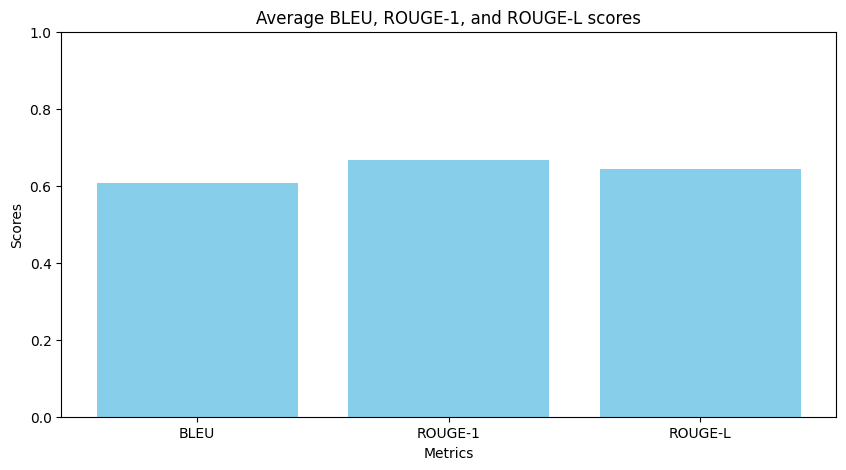

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Average BLEU, ROUGE-1, and ROUGE-L scores')
plt.ylim(0, 1)
plt.show()

In [ ]:
key_metrics = ['Component Name', 'Style', 'Border Radius', 'Stroke Weight', 'Drop Shadow']


In [ ]:
correctness_values = [overall_component_correct, overall_style_correct, overall_border_radius_correct, overall_stroke_weight_correct, overall_drop_shadow_correct]


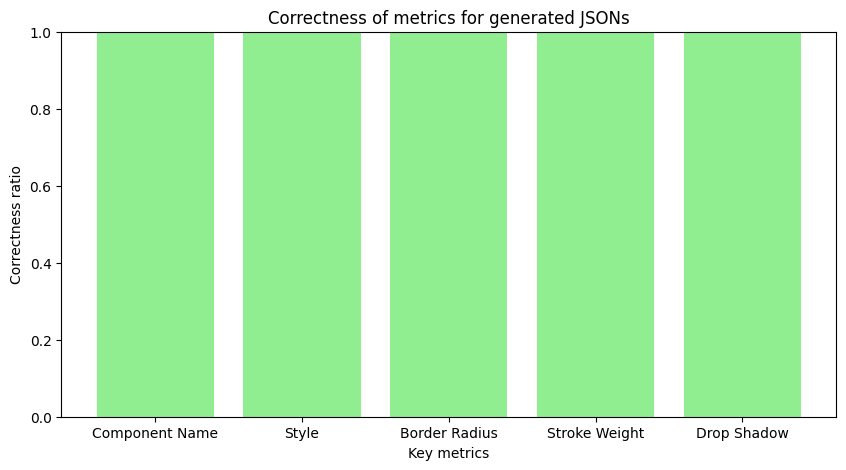

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(key_metrics, correctness_values, color='lightgreen')
plt.xlabel('Key metrics')
plt.ylabel('Correctness ratio')
plt.title('Correctness of metrics for generated JSONs')
plt.ylim(0, 1)
plt.show()

In [ ]:
bleu_scores = []
rouge1_scores = []
rougeL_scores = []

In [ ]:
for i, reference_json in enumerate(subset_reference_jsons):
  generated_json = generated_jsons[i]
  reference_json_str = json.dumps(reference_json) if isinstance(reference_json, dict) else reference_json

  bleu_scores.append(calculate_bleu(reference_json_str, generated_json))
  rouge1_score, rougeL_score = calculate_rouge(reference_json_str, generated_json)
  rouge1_scores.append(rouge1_score)
  rougeL_scores.append(rougeL_score)

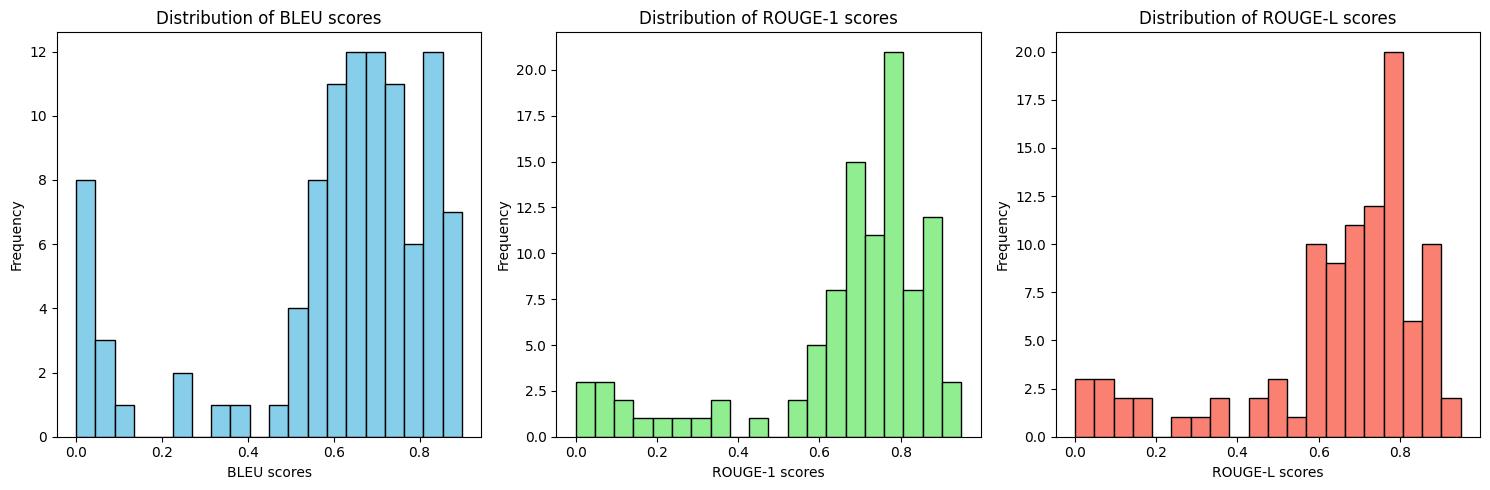

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(bleu_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BLEU scores')
plt.xlabel('BLEU scores')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(rouge1_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of ROUGE-1 scores')
plt.xlabel('ROUGE-1 scores')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(rougeL_scores, bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of ROUGE-L scores')
plt.xlabel('ROUGE-L scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
def identify_component_name_in_json(json_str):
  """method to identify the component name in the json
  Parameters
  json_str-json string
  Returns
  component name-component name
  """
  match = re.search(r'"component_name"\s*:\s*"([^"]+)"', json_str)
  if match:
    return match.group(1).replace("-", " ").lower()
  return None

In [ ]:
def identify_component_name_in_description(description):
  """method to identify the component name in the description
  Parameters
  description-description
  Returns
  component name-component name
  """
  components = ['icon-button', 'button', 'label', 'input-field', 'menu', 'list-item']
  description_lower = description.lower()

  #normalize description by removing spaces and hyphens
  normalized_description = description_lower.replace(" ", "").replace("-", "")

  for component in components:
    normalized_component = component.replace("-", "")
    if normalized_component in normalized_description:
      return component

  return None

In [ ]:
def calculate_component_accuracy(reference_str, generated_str):
  """method to calculate the component accuracy
  Parameters
  reference_str-reference json string
  generated_str-generated json string
  Returns
  is_correct-is correct
  ref_component_name-reference component name
  gen_component_name-generated component name
  """
  ref_component_name = identify_component_name_in_json(reference_str)
  gen_component_name = identify_component_name_in_json(generated_str)
  # "icon" being equal to "icon button"
  if ref_component_name == "icon button" and gen_component_name == "icon":
    gen_component_name = "icon button"
  if ref_component_name is None or gen_component_name is None:
    return False, ref_component_name, gen_component_name
  return ref_component_name == gen_component_name, ref_component_name, gen_component_name


In [ ]:
true_labels = []
predicted_labels = []
correct_component_predictions = 0


In [ ]:
for i, reference_str in enumerate(subset_reference_jsons):
  generated_str = generated_jsons[i]

  print(f"Dataset JSON: {reference_str}")
  print(f"Generated JSON: {generated_str}")

  #component accuracy
  is_correct, ref_component_name, gen_component_name = calculate_component_accuracy(reference_str, generated_str)

  # Only append non-None values
  if ref_component_name is not None and gen_component_name is not None:
    true_labels.append(ref_component_name)
    predicted_labels.append(gen_component_name)
    if is_correct:
      correct_component_predictions += 1

  print(f"Description: {subset_prompts[i]}")
  print(f"Name in Dataset: {ref_component_name}")
  print(f"Name in Generated: {gen_component_name}")
  print("--------------------------------------------------")

Dataset JSON: {"variant_properties": {"color": "rgba(0, 0, 0, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "Button", "textColor": "rgba(0, 0, 0, 1.0)", "borderRadius": 9999.0, "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "effects": [], "padding": 0, "width": 44.0, "height": 22.0, "x": -6996.0, "y": 4447.0, "hasIcon": true, "style": "Trendy", "component_name": "Label", "subtype": "Light", "variant_details": {"Size": ["Medium"]}}}
Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.30000001192092896)", "type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.15000000596046448)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5309.0, "y": -5309.0, "style": "Trendy", "component_name": "Label", "subtype": "Light

In [ ]:

true_labels = ['none' if label is None else label for label in true_labels]
predicted_labels = ['none' if label is None else label for label in predicted_labels]


In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8624454148471615
Precision: 0.9423448861820893
Recall: 0.8624454148471615
F1 Score: 0.8964758222578098


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
#confusion matrix
labels = ["button", "label", "input-field", "list-item", "menu", "icon button", "none"]
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)


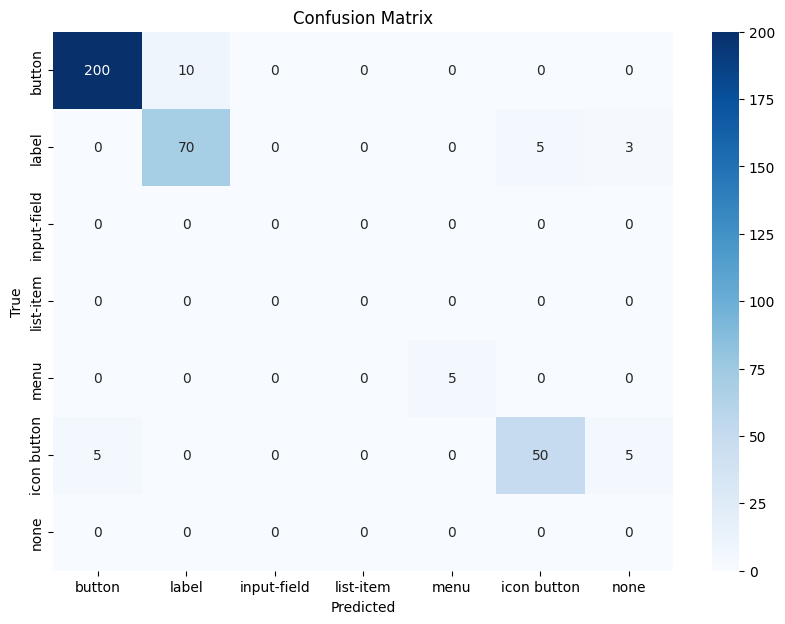

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

In [ ]:
#Binarize the labels for ROC calculation
true_binarized = label_binarize(true_labels, classes=labels)
pred_binarized = label_binarize(predicted_labels, classes=labels)


In [ ]:
for i in range(true_binarized.shape[1]):
  fpr[i], tpr[i], _ = roc_curve(true_binarized[:, i], pred_binarized[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


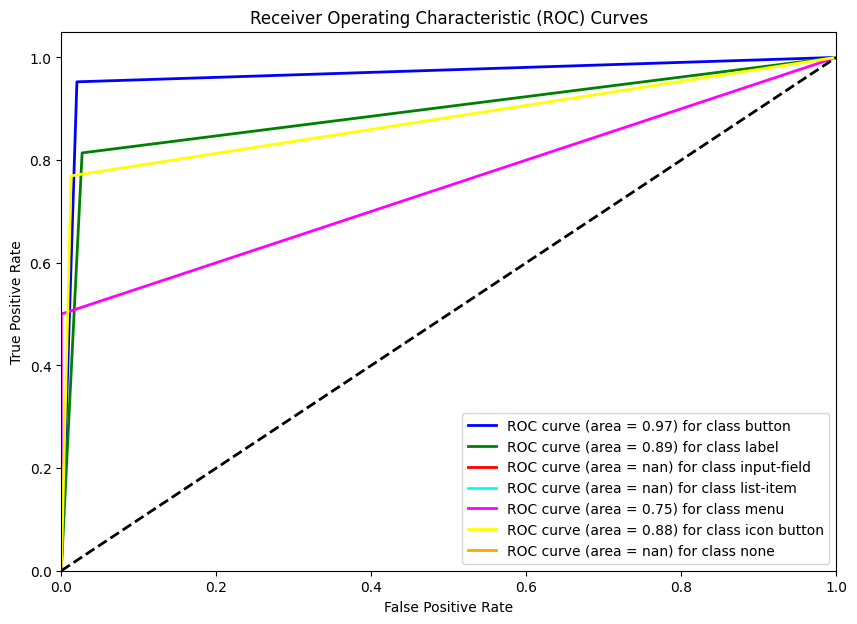

In [ ]:
#Plot ROC curve for each class
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange']
for i, color in enumerate(colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {labels[i]}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## Simple T5 Complex JSON

### Model

In [ ]:
#save to drive
model_save_path= '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NESTED'

In [ ]:
def load_model_and_tokenizer(model_path):
  """ method to load the model and tokenizer
  Parameters
  model_path: path to the model and tokenizer
  Return
  model: loaded model
  tokenizer: loaded tokenizer
  """
  model= T5ForConditionalGeneration.from_pretrained(model_path)
  tokenizer= T5Tokenizer.from_pretrained(model_path)
  return model,tokenizer

model, tokenizer = load_model_and_tokenizer(model_save_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def standardize_prompt(prompt):
  """ method to standardize the prompt
  Parameters
  prompt: prompt to standardize
  Return
  standardized_prompt: standardized prompt
  """
  term_mappings = {
    "menu item": "menu",
    "menuitem": "menu",
    "menu list": "menu",
    "list item": "list-item",
    "listitem": "list-item",
    "input field": "input-field",
    "inputfield": "input-field",
    "iconbutton": "icon-button",
    "iconbutton": "icon-button",
    "button": "button",
    "label": "label"

  }
  for term, standard_term in term_mappings.items():
    prompt = prompt.replace(term, standard_term)

  return prompt

In [ ]:
def generate_json(prompt, model, tokenizer, max_length=1024):
 """ method to generate the json from the prompt
  Parameters
  prompt: prompt to generate the json
  model: model to generate the json
  tokenizer: tokenizer to generate the json
  max_length: maximum length of the json
  Return
  generated_json_str: generated json string
  """

  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  model.to(device)
  prompt = standardize_prompt(prompt)
  inputs = tokenizer(prompt, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length).to(device)
  outputs = model.generate(
    inputs['input_ids'],
    max_length=max_length,
    num_beams=5,
    early_stopping=True,
    temperature=0
  )
  generated_json_str = tokenizer.decode(outputs[0], skip_special_tokens=True)
  return generated_json_str

### button

In [ ]:
prompt_button_1= "Generate a Professional button with a state of hover."

In [ ]:
generated_json= generate_json(prompt_button_1, model, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "button", "subtype": "Default", "variant_details": "State": ["Hover"], "name": "State=Hover", "type": "COMPONENT", "children": ["name": "Hover", "type": "TEXT", "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "characters": "Button text", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]


In [ ]:
prompt_button_2= "Generate a Professional button with a size of small, state of default."

In [ ]:
generated_json= generate_json(prompt_button_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": "Size": ["small"], "State": ["Default"], "name": "Size=small, State=Default", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 24.0, "height": 24.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_button_3= "Generate a Basic button with DROP_SHADOW effects."

In [ ]:
generated_json= generate_json(prompt_button_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "Button", "subtype": "Default", "variant_details": "Size": ["Medium"], "name": "Size=Medium", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 44.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_button_4="Generate a Professional Button with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_button_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": "Theme": ["Light"], "Size": ["Small"], "Type": ["Primary"], "State": ["Pressed"], "Icon": ["True"], "Icon Position": ["None"], "name": "Theme=Light, Size=Small, Type=Primary, State=Pressed, Icon=True, Icon Position=Left", "type": "COMPONENT", "children": ["name": "Icon", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 10.666666030883789, "iconHeight": 10.666666030883789, "iconColor": ], "name": "Text", "type": "TEXT", "fontFamily": "Inter", "fontWeight": 500, "fontSize": 16.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]


In [ ]:
prompt_button_5="Generate a Trendy Button"

In [ ]:
generated_json= generate_json(prompt_button_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Trendy", "component_name": "Button", "subtype": "Dark", "variant_details": "appearance": ["subtle link"], "state": ["focus"], "spacing": ["compact"], "isSelected": ["false"], "isDisabled": ["false"], "isLoading": ["false"], "iconOnly": ["false"], "name": "appearance=subtle link, state=focus, spacing=compact, isSelected=false, isDisabled=false, isLoading=false, iconOnly=false", "type": "COMPONENT", "children": ["name": "FocusRing>", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 18.0, "iconHeight": 18.0, "iconColor": "r": 0.2666666805744171, "g": 0.3294117748737335, "b": 0.43529412150382996, "a": 1.0]]


### Label

In [ ]:
prompt_label_1= "Generate a Professional label with a state of hover."

In [ ]:
generated_json= generate_json(prompt_label_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "Label", "subtype": "Default", "variant_details": "State": ["Hover"], "name": "State=Hover", "type": "COMPONENT", "children": ["name": "Hover", "type": "TEXT", "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "characters": "Label", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]


In [ ]:
prompt_label_2= "Generate a casual label with a size of small."

In [ ]:
generated_json= generate_json(prompt_label_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "Label", "subtype": "Small", "variant_details": "Size": ["small"], "name": "Size=small", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 44.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_label_3= "Generate a label with DROP_SHADOW effects."

In [ ]:
generated_json= generate_json(prompt_label_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Trendy", "component_name": "Label", "subtype": "Light", "variant_details": "Style": ["outlined"], "Configuration": ["label only"], "State": ["pressed"], "Selected": ["false"], "Show trailing icon": ["false"], "name": "Style=outlined, Configuration=label only, State=pressed, Selected=false, Show trailing icon=false", "type": "COMPONENT", "children": ["name": "state-layer", "type": "FRAME", "width": 103.0, "height": 32.0, "fills": ["color": "r": 0.11372549086809158, "g": 0.10588235408067703, "b": 0.125490203499794, "a": 1.0], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon", "type": "INSTANCE", "children": ["name": "icon", "type": "BOOLEAN_OPERATION", "children": ["name": "Path", "type": "VECTOR", "iconWidth": 13.5, "iconHeight": 13.5, "iconColor": "r": 0.8549019694328308, "g": 0.8549019694328308, "b": 0.8549019694328308, "a": 1.0, "name": "Path", "type": "VECTOR", "iconWidth": 9.277500152587

In [ ]:
prompt_label_4="Generate a default label with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_label_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "Label", "subtype": "Default", "variant_details": "Size": ["Medium"], "name": "Size=Medium", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 44.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_label_5="Generate a Professional label"

In [ ]:
generated_json= generate_json(prompt_label_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "Label", "subtype": "Light", "variant_details": "Style": ["outlined"], "Configuration": ["label only"], "State": ["pressed"], "Selected": ["false"], "Show trailing icon": ["false"], "name": "Style=outlined, Configuration=label only, State=pressed, Selected=false, Show trailing icon=false", "type": "COMPONENT", "children": ["name": "state-layer", "type": "FRAME", "width": 103.0, "height": 32.0, "fills": ["color": "r": 0.11372549086809158, "g": 0.10588235408067703, "b": 0.125490203499794, "a": 1.0], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "label-text", "type": "TEXT", "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "characters": "Label", "textColor": "r": 0.11372549086809158, "g": 0.10588235408067703, "b": 0.125490203499794, "a": 1.0]]


### input field

In [ ]:
prompt_input_1= "Generate a Basic input-field with a state of hover."

In [ ]:
generated_json= generate_json(prompt_input_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "input-field", "subtype": "Default", "variant_details": "State": ["hover"], "name": "State=hover", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 320.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / UserOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Prefix", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 16.0, "characters": "Prefix", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_input_2= "Generate a input-field."

In [ ]:
generated_json= generate_json(prompt_input_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "input-field", "subtype": "Default", "variant_details": "State": ["Default"], "Size": ["Large"], "name": "State=Default, Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 320.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / UserOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 11.750079154968262, "iconHeight": 12.4375, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Prefix", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 16.0, "characters": "Prefix", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0, "name": "Input", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 16.0, "characters": "Input", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_input_3= "Generate a Professional input-field with a state of small."

In [ ]:
generated_json= generate_json(prompt_input_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "input-field", "subtype": "Default", "variant_details": "State": ["small"], "name": "State=small", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 320.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / UserOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Prefix", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 16.0, "characters": "Prefix", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0, "name": "Input", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 16.0, "characters": "Input", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_input_4="Generate a default input field with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_input_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "input field", "subtype": "Default", "variant_details": "State": ["Default"], "name": "State=Default", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 44.0, "height": 44.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / UserOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Prefix", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Prefix", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_input_5="Generate a playful input field with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_input_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Playful", "component_name": "input field", "subtype": "Default", "variant_details": "State": ["Disabled"], "Size": ["Large"], "name": "State=Disabled, Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 320.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Prefix", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 16.0, "characters": "Prefix", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


### Menu

In [ ]:
prompt_menu_1= "Generate a Basic menu with a state of hover."

In [ ]:
generated_json= generate_json(prompt_menu_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "menu", "subtype": "Default", "variant_details": "State": ["Hover"], "name": "State=Hover", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 44.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_menu_2= "Generate a menu."

In [ ]:
generated_json= generate_json(prompt_menu_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "menu", "subtype": "Default", "variant_details": "Type": ["Default"], "Size": ["Large"], "State": ["Default"], "Content": ["False"], "Ghost": ["False"], "Danger": ["True"], "Shape": ["Default"], "name": "Type=Default, Size=Large, State=Default, Content=False, Danger=True, Shape=Default", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 44.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_menu_3= "Generate a Professional menu item with a small state."

In [ ]:
generated_json= generate_json(prompt_menu_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "menu", "subtype": "Default", "variant_details": "State": ["Default"], "name": "State=Default", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 44.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_menu_4="Generate a default menu item with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_menu_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "menu", "subtype": "Default", "variant_details": "Size": ["Large"], "name": "Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_menu_5="Generate a playful menu list with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_menu_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Playful", "component_name": "menu", "subtype": "Dark", "variant_details": "Configuration": ["menu"], "State": ["disabled"], "Selected": ["false"], "Show menu": ["true"], "name": "Configuration=menu, State=disabled, Selected=true, Show icon=true", "type": "COMPONENT", "children": ["name": "state-layer", "type": "FRAME", "width": 85.0, "height": 32.0, "fills": ["color": "r": 0.7921568751335144, "g": 0.7686274647712708, "b": 0.7686274647712708, "a": 1.0], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon", "type": "INSTANCE", "children": ["name": "icon", "type": "BOOLEAN_OPERATION", "children": ["name": "Path", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.7921568751335144, "g": 0.7686274647712708, "b": 0.7400000095367432, "a": 1.0, "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "chara

### list-item

In [ ]:
prompt_list_1= "Generate a Basic list item with a state of hover."

In [ ]:
generated_json= generate_json(prompt_list_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "list-item", "subtype": "Light", "variant_details": "Condition": ["2-line"], "Leading": ["Radio Button"], "Trailing": ["None"], "Show overline": ["True"], "Show supporting text": ["True"], "name": "Condition=2-line, Leading=Radio Button, Trailing=Radio Button, Show overline=True, Show supporting text=True", "type": "COMPONENT", "children": ["name": "state-layer overlay", "type": "INSTANCE", "children": [], "name": "state-layer", "type": "FRAME", "width": 360.0, "height": 88.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading element", "type": "FRAME", "width": 56.0, "height": 64.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Building Blocks/video-Thumbnail", "type": "INSTANCE", "children": ["name": "Thumbnail", "type": "RECTANGLE", "width": 56.0, "height": 56.0, "fillColor": ]], "name": "Co

In [ ]:
prompt_list_2= "Generate a list item."

In [ ]:
generated_json= generate_json(prompt_list_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "list-item", "subtype": "Dark", "variant_details": "Condition": ["3-line+"], "Leading": ["Radio Button"], "Trailing": ["None"], "Show overline": ["False"], "Show supporting text": ["True"], "name": "Condition=3-line+, Leading=Radio Button, Trailing=Radio Button, Show overline=False, Show supporting text=True", "type": "COMPONENT", "children": ["name": "state-layer overlay", "type": "INSTANCE", "children": [], "name": "state-layer", "type": "FRAME", "width": 360.0, "height": 88.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading element", "type": "FRAME", "width": 56.0, "height": 64.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Building Blocks/video-Thumbnail", "type": "INSTANCE", "children": ["name": "Thumbnail", "type": "RECTANGLE", "width": 56.0, "height": 56.0, "fillColor": ]], "

In [ ]:
prompt_list_3= "Generate a playful listitem with a state of hover."

In [ ]:
generated_json= generate_json(prompt_list_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Playful", "component_name": "list-item", "subtype": "Dark", "variant_details": "Condition": ["2-line"], "Leading": ["Radio Button"], "Trailing": ["Icon"], "Show overline": ["False"], "Show supporting text": ["True"], "name": "Condition=2-line, Leading=Radio Button, Trailing=Radio Button, Show overline=False, Show supporting text=True", "type": "COMPONENT", "children": ["name": "state-layer overlay", "type": "INSTANCE", "children": [], "name": "state-layer", "type": "FRAME", "width": 360.0, "height": 88.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading element", "type": "FRAME", "width": 56.0, "height": 64.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Building Blocks/video-Thumbnail", "type": "INSTANCE", "children": ["name": "Thumbnail", "type": "RECTANGLE", "width": 56.0, "height": 56.0, "fillColor": ]], "name": 

In [ ]:
prompt_list_4="Generate a default listitem with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_list_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "list-item", "subtype": "Light", "variant_details": "Condition": ["3-line+"], "Leading": ["Radio Button"], "Trailing": ["Icon"], "Show overline": ["False"], "Show supporting text": ["True"], "name": "Condition=3-line+, Leading=Radio Button, Trailing=Icon, Show overline=False, Show supporting text=True", "type": "COMPONENT", "children": ["name": "state-layer overlay", "type": "INSTANCE", "children": [], "name": "state-layer", "type": "FRAME", "width": 360.0, "height": 88.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading element", "type": "FRAME", "width": 56.0, "height": 64.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Building Blocks/video-Thumbnail", "type": "INSTANCE", "children": ["name": "Thumbnail", "type": "RECTANGLE", "width": 56.0, "height": 56.0, "fillColor": ]], "name": 

In [ ]:
prompt_list_5="Generate a trendy menu list with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_list_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Trendy", "component_name": "menu", "subtype": "Dark", "variant_details": "Style": ["outlined"], "Configuration": ["menu"], "State": ["disabled"], "Selected": ["false"], "Show trailing icon": ["false"], "name": "Style=outlined, Configuration=menu, State=disabled, Selected=false, Show trailing icon=false", "type": "COMPONENT", "children": ["name": "state-layer", "type": "FRAME", "width": 85.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading icon", "type": "INSTANCE", "children": ["name": "icon", "type": "BOOLEAN_OPERATION", "children": ["name": "Path", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0

### icon button

In [ ]:
prompt_icon_1= "Generate a Basic icon button with a state of hover."

In [ ]:
generated_json= generate_json(prompt_icon_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "icon-button", "subtype": "Default", "variant_details": "Size": ["Large"], "name": "Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 40.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 16.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_icon_2= "Generate a iconbutton."

In [ ]:
generated_json= generate_json(prompt_icon_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "icon-button", "subtype": "Default", "variant_details": "Size": ["Medium"], "name": "Size=Medium", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_icon_3= "Generate a playful iconbutton with a state of hover."

In [ ]:
generated_json= generate_json(prompt_icon_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Playful", "component_name": "icon-button", "subtype": "Default", "variant_details": "State": ["Hover"], "name": "State=Hover", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_icon_4="Generate a default icon button with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_icon_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "icon-button", "subtype": "Default", "variant_details": "Size": ["Medium"], "name": "Size=Medium", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_icon_5="Generate a trendy icon button with a stroke weight of 2.0"

In [ ]:
generated_json= generate_json(prompt_icon_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Trendy", "component_name": "icon-button", "subtype": "Default", "variant_details": "Size": ["Small"], "name": "Size=Small", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 24.0, "height": 24.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 10.93754768371582, "iconHeight": 10.93754768371582, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


### Metrics

In [ ]:

def calculate_bleu(reference, hypothesis):
  """method to calculate the bleu score
  Parameters
  reference-reference json string
  hypothesis-generated json string
  Returns
  bleu score-bleu score
  """
  reference_tokens = nltk.word_tokenize(reference)
  hypothesis_tokens = nltk.word_tokenize(hypothesis)
  return nltk.translate.bleu_score.sentence_bleu([reference_tokens], hypothesis_tokens)


In [ ]:
def calculate_rouge(reference, hypothesis):
  """method to calculate the rouge score
  Parameters
  reference-reference json string
  hypothesis-generated json string
  Returns
  rouge1 score-rouge1 score
  rougeL score-rougeL score
  """
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
  scores = scorer.score(reference, hypothesis)
  return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
def calculate_key_metrics(reference_json, generated_json_str):
  """method to calculate the key metrics
  Parameters
  reference_json-reference json string
  generated_json_str-generated json string
  Returns
  component_name_correct-component name correct
  style_correct-style correct
  border_radius_correct-border radius correct
  stroke_weight_correct-stroke weight correct
  drop_shadow_correct-drop shadow correct
  """
  try:
    reference_data = json.loads(reference_json)
  except json.JSONDecodeError:
    print("Error decoding reference JSON")
    return 0, 0, 0, 0, 0  # default values if decoding fails

  #key phrases directly in the generated JSON string
  component_name_correct = reference_data.get('component_name', '') in generated_json_str
  style_correct = reference_data.get('style', '') in generated_json_str
  border_radius_correct = str(reference_data.get('border_radius', '')) in generated_json_str
  stroke_weight_correct = str(reference_data.get('stroke_weight', '')) in generated_json_str
  drop_shadow_correct = 'drop_shadow' in generated_json_str if 'drop_shadow' in reference_data else True

  return component_name_correct, style_correct, border_radius_correct, stroke_weight_correct, drop_shadow_correct

In [ ]:
#subset
subset_size = 100

In [ ]:
# a random subset of the dataset
subset_indices = random.sample(range(len(json_data_1)), subset_size)
subset_prompts = [prompts_1[i] for i in subset_indices]
subset_reference_jsons = [json_data_1[i] for i in subset_indices]

In [ ]:
generated_jsons = [generate_json(prompt, model, tokenizer) for prompt in subset_prompts]

In [ ]:
total_bleu, total_rouge1, total_rougeL = 0, 0, 0
true_component_names = []
predicted_component_names = []

In [ ]:
for i, reference_json in enumerate(subset_reference_jsons):
  generated_json = generated_jsons[i]

  #BLEU score
  bleu_score = calculate_bleu(reference_json, generated_json)
  total_bleu += bleu_score

  #ROUGE score
  rouge1_score, rougeL_score = calculate_rouge(reference_json, generated_json)
  total_rouge1 += rouge1_score
  total_rougeL += rougeL_score

In [ ]:

overall_component_correct, overall_style_correct = 0, 0
overall_border_radius_correct, overall_stroke_weight_correct, overall_drop_shadow_correct = 0, 0, 0


In [ ]:
for i, reference_json in enumerate(subset_reference_jsons):
  generated_json = generated_jsons[i]

  # key metrics
  component_correct, style_correct, border_radius_correct, stroke_weight_correct, drop_shadow_correct = calculate_key_metrics(reference_json, generated_json)

  #Sum up  individual metrics for overall calculation
  overall_component_correct += component_correct
  overall_style_correct += style_correct
  overall_border_radius_correct += border_radius_correct
  overall_stroke_weight_correct += stroke_weight_correct
  overall_drop_shadow_correct += drop_shadow_correct

In [ ]:
total_prompts = len(subset_prompts)
overall_component_correct /= total_prompts
overall_style_correct /= total_prompts
overall_border_radius_correct /= total_prompts
overall_stroke_weight_correct /= total_prompts
overall_drop_shadow_correct /= total_prompts


In [ ]:
#overall BLEU and ROUGE scores
average_bleu = total_bleu / total_prompts
average_rouge1 = total_rouge1 / total_prompts
average_rougeL = total_rougeL / total_prompts


In [ ]:
print(f"Overall Component Name Correct: {overall_component_correct}")
print(f"Overall Style Correct: {overall_style_correct}")
print(f"Overall Border Radius Correct: {overall_border_radius_correct}")
print(f"Overall Stroke Weight Correct: {overall_stroke_weight_correct}")
print(f"Overall Drop Shadow Correct: {overall_drop_shadow_correct}")
print(f"Average BLEU Score: {average_bleu}")
print(f"Average ROUGE-1 Score: {average_rouge1}")
print(f"Average ROUGE-L Score: {average_rougeL}")

Overall Component Name Correct: 1.0
Overall Style Correct: 1.0
Overall Border Radius Correct: 1.0
Overall Stroke Weight Correct: 1.0
Overall Drop Shadow Correct: 1.0
Average BLEU Score: 0.37693133684260943
Average ROUGE-1 Score: 0.45444266315771975
Average ROUGE-L Score: 0.2413767663086081


In [ ]:
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-L']

In [ ]:
values = [average_bleu, average_rouge1, average_rougeL]


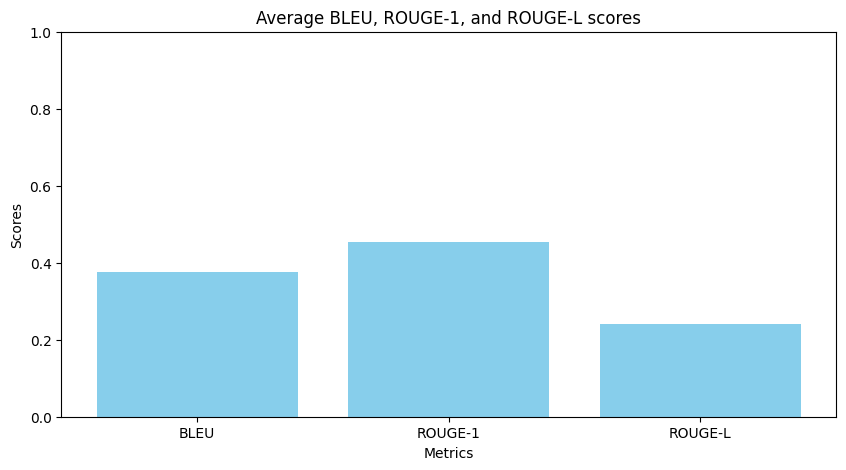

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Average BLEU, ROUGE-1, and ROUGE-L scores')
plt.ylim(0, 1)
plt.show()

In [ ]:
key_metrics = ['Component Name', 'Style', 'Border Radius', 'Stroke Weight', 'Drop Shadow']


In [ ]:
correctness_values = [overall_component_correct, overall_style_correct, overall_border_radius_correct, overall_stroke_weight_correct, overall_drop_shadow_correct]


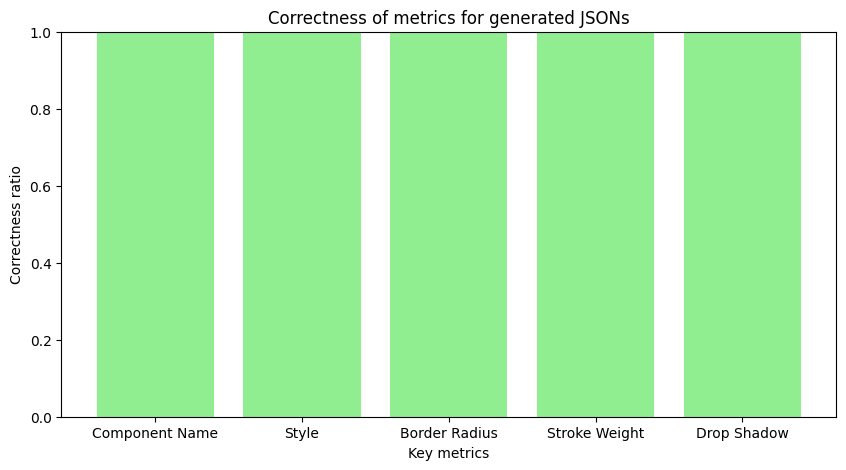

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(key_metrics, correctness_values, color='lightgreen')
plt.xlabel('Key metrics')
plt.ylabel('Correctness ratio')
plt.title('Correctness of metrics for generated JSONs')
plt.ylim(0, 1)
plt.show()

In [ ]:
bleu_scores = []
rouge1_scores = []
rougeL_scores = []

In [ ]:

for i, reference_json in enumerate(subset_reference_jsons):
  generated_json = generated_jsons[i]
  reference_json_str = json.dumps(reference_json) if isinstance(reference_json, dict) else reference_json

  bleu_scores.append(calculate_bleu(reference_json_str, generated_json))
  rouge1_score, rougeL_score = calculate_rouge(reference_json_str, generated_json)
  rouge1_scores.append(rouge1_score)
  rougeL_scores.append(rougeL_score)

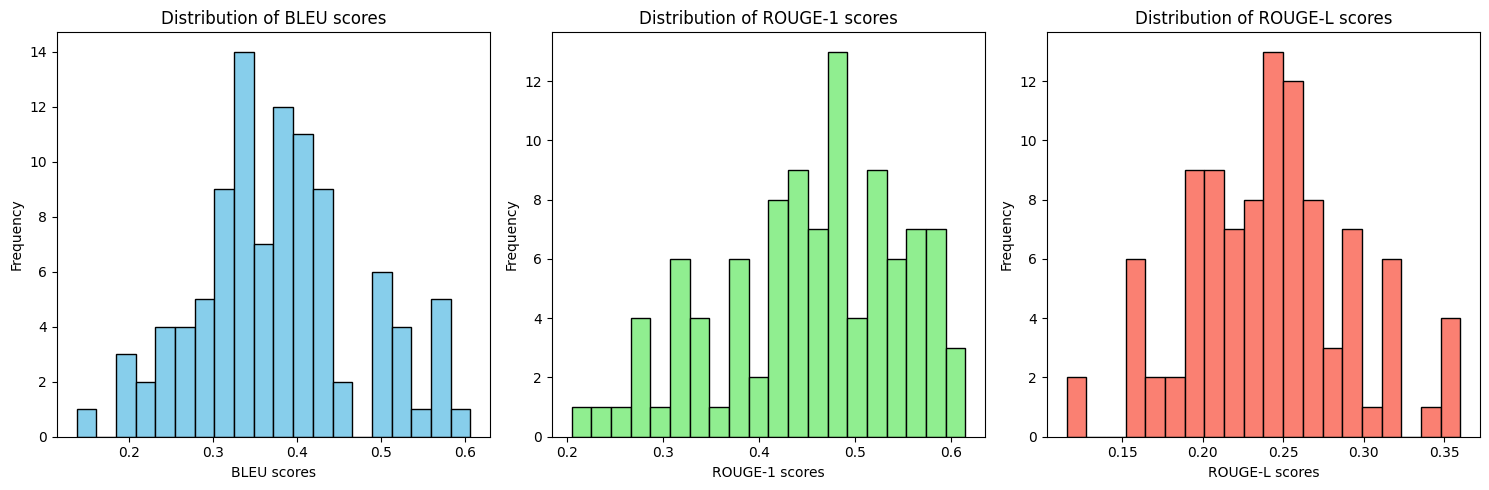

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(bleu_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BLEU scores')
plt.xlabel('BLEU scores')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(rouge1_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of ROUGE-1 scores')
plt.xlabel('ROUGE-1 scores')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(rougeL_scores, bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of ROUGE-L scores')
plt.xlabel('ROUGE-L scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
def identify_component_name_in_json(json_str):
  """method to identify the component name in the json string
  Parameters
  json_str-json string
  Returns
  component name-component name
  """
  match = re.search(r'"component_name"\s*:\s*"([^"]+)"', json_str)
  if match:
    return match.group(1).replace("-", " ").lower()
  return None

In [ ]:
def identify_component_name_in_description(description):
  """method to identify the component name in the description
  Parameters
  description-description
  Returns
  component name-component name
  """
  components = ['icon-button', 'button', 'label', 'input-field', 'menu', 'list-item']
  description_lower = description.lower()

  #normalize description by removing spaces and hyphens
  normalized_description = description_lower.replace(" ", "").replace("-", "")

  for component in components:
    normalized_component = component.replace("-", "")
    if normalized_component in normalized_description:
      return component

  return None

In [ ]:
def calculate_component_accuracy(reference_str, generated_str):
  """method to calculate the component accuracy
  Parameters
  reference_str-reference json string
  generated_str-generated json string
  Returns
  is_correct-is correct
  ref_component_name-reference component name
  gen_component_name-generated component name
  """
  ref_component_name = identify_component_name_in_json(reference_str)
  gen_component_name = identify_component_name_in_json(generated_str)
  # "icon" being equal to "icon button"
  if ref_component_name == "icon button" and gen_component_name == "icon":
    gen_component_name = "icon button"
  if ref_component_name is None or gen_component_name is None:
    return False, ref_component_name, gen_component_name
  return ref_component_name == gen_component_name, ref_component_name, gen_component_name


In [ ]:
true_labels = []
predicted_labels = []
correct_component_predictions = 0


In [ ]:
for i, reference_str in enumerate(subset_reference_jsons):
  generated_str = generated_jsons[i]

  print(f"Dataset JSON: {reference_str}")
  print(f"Generated JSON: {generated_str}")

  #component accuracy
  is_correct, ref_component_name, gen_component_name = calculate_component_accuracy(reference_str, generated_str)

  # Only append non-None values
  if ref_component_name is not None and gen_component_name is not None:
    true_labels.append(ref_component_name)
    predicted_labels.append(gen_component_name)
    if is_correct:
      correct_component_predictions += 1

  print(f"Description: {subset_prompts[i]}")
  print(f"Name in Dataset: {ref_component_name}")
  print(f"Name in Generated: {gen_component_name}")
  print("--------------------------------------------------")

Dataset JSON: {"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Button field", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 1.0, "fontFamily": "Inter", "fontWeight": 700, "fontSize": 16.0, "effects": [], "padding": 0, "width": 8.0, "height": 8.0, "x": -2523.0, "y": 16882.0, "hasIcon": true, "style": "Professional", "component_name": "Label", "subtype": "Small", "variant_details": {"\ud83c\udfb2 Type": ["Primary"], "\ud83c\udf9a\ufe0f State": ["Hover"], "\ud83d\udccf Size": ["Medium"]}}}
Generated JSON: "variant_properties": "style": "Trendy", "component_name": "Label", "subtype": "Light", "variant_details":

In [ ]:
# Replace None with 'none' to avoid type errors
true_labels = ['none' if label is None else label for label in true_labels]
predicted_labels = ['none' if label is None else label for label in predicted_labels]


In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
#confusion matrix
labels = ["button", "label", "input-field", "list-item", "menu", "icon button", "none"]
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)


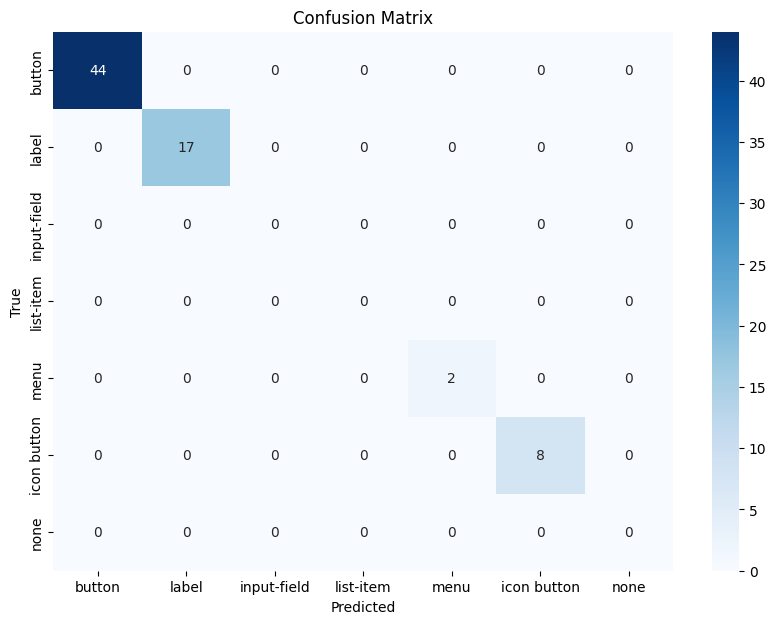

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

In [ ]:
#binarize the labels for ROC calculation
true_binarized = label_binarize(true_labels, classes=labels)
pred_binarized = label_binarize(predicted_labels, classes=labels)


In [ ]:
for i in range(true_binarized.shape[1]):
  fpr[i], tpr[i], _ = roc_curve(true_binarized[:, i], pred_binarized[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


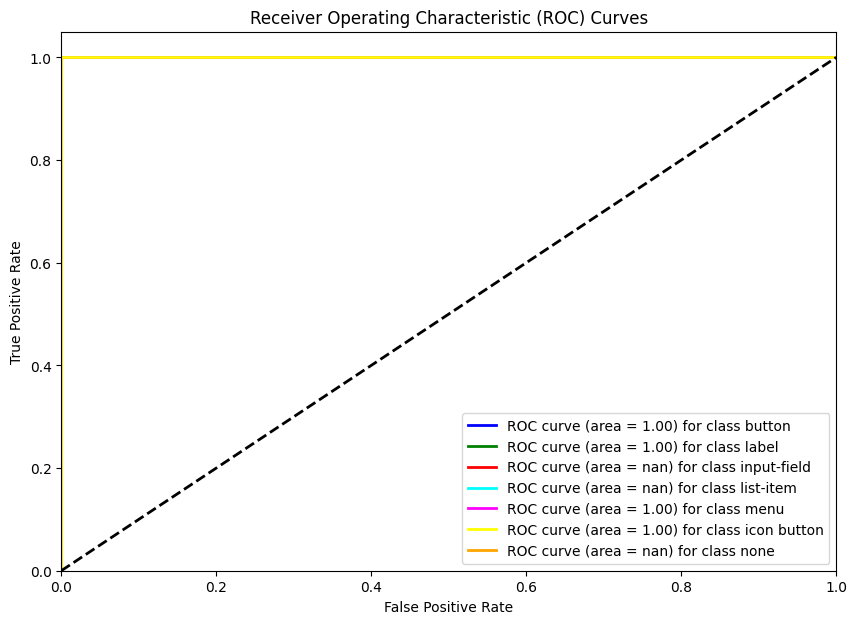

In [ ]:
# ROC curve for each class
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {labels[i]}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## Complex T5 Simple JSON

### Model

In [ ]:
checkpoint_path = "/content/drive/My Drive/Implementation/Final Thesis/FYP/UpdatedResults/checkpoint-16500"

In [ ]:
loaded_model = T5ForConditionalGeneration.from_pretrained(checkpoint_path).to(device)

In [ ]:
original_model_path = "t5-small"

In [ ]:
loaded_tokenizer = T5Tokenizer.from_pretrained(original_model_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def generate_json(prompt, model, tokenizer, max_length=1024):
  """method to generate the json string
  Parameters
  prompt-prompt
  model-model
  tokenizer-tokenizer
  max_length-max length
  Returns
  generated json string
  """
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  model.to(device)
  # Standardize the prompt
  prompt = standardize_prompt(prompt)
  inputs = tokenizer(prompt, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length).to(device)
  outputs = model.generate(
    inputs['input_ids'],
    max_length=max_length,
    num_beams=5,
    early_stopping=True,
    temperature=0
  )
  generated_json_str = tokenizer.decode(outputs[0], skip_special_tokens=True)
  return generated_json_str

In [ ]:
def standardize_prompt(prompt):
  """method to standardize the prompt
  Parameters
  prompt-prompt
  Returns
  standardized prompt-standardized prompt
  """
  term_mappings = {
    "menu item": "menu",
    "menuitem": "menu",
    "menu list": "menu",
    "list item": "list-item",
    "listitem": "list-item",
    "input field": "input-field",
    "inputfield": "input-field",
    "iconbutton": "icon-button",
    "iconbutton": "icon-button",
    "button": "button",
    "label": "label"

  }
  for term, standard_term in term_mappings.items():
    prompt = prompt.replace(term, standard_term)

  return prompt

### Button

In [ ]:
prompt_button_1= "Generate a Professional button with a state of hover."

In [ ]:
generated_json= generate_json(prompt_button_1, loaded_model, loaded_tokenizer)


In [ ]:
print(generated_json)

"variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5349.0, "y": -5349.0, "style": "Professional", "component_name": "Button", "subtype": "Light", "variant_details": "State": ["hover"]


In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Segoe UI", "fontWeight": 500, "fontSize": 14.0, "effects": [], "padding": 0, "width": 35.0, "height": 20.0, "x": -580.0, "y": -580.0, "style": "Professional", "component_name": "Button", "subtype": "Light", "variant_details": "State": ["hover"]


In [ ]:
prompt_button_2= "Generate a Professional button with a size of small, state of default."

In [ ]:
generated_json= generate_json(prompt_button_2, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Button text", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5349.0, "y": -5393.0, "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": "Size": ["small"], "state": ["default"]


In [ ]:
prompt_button_3= "Generate a Basic button with DROP_SHADOW effects."

In [ ]:
generated_json= generate_json(prompt_button_3, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Button text", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 44.0, "height": 22.0, "x": -5349.0, "y": -5349.0, "style": "Basic", "component_name": "Button", "subtype": "Default", "variant_details": "Type": ["Default"], "Size": ["Default"], "State": ["Hover"], "Content": ["Basic"], "Ghost": ["False"], "Danger": ["True"], "Shape": ["Default"]


In [ ]:
prompt_button_4="Generate a Professional Button with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_button_4, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)", "rgba(255, 255, 2

In [ ]:
prompt_button_5="Generate a Trendy Button"

In [ ]:
generated_json= generate_json(prompt_button_5, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(0, 0, 0, 1.0)", "strokes": ["rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.

### Label

In [ ]:
prompt_label_1= "Generate a Professional label with a state of hover."

In [ ]:
generated_json= generate_json(prompt_label_1, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.30000001192092896)", "type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.15000000596046448)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5349.0, "y": -4747.0, "style": "Professional", "component_name": "label", "subtype": "Light", "variant_details": "State": ["hover"]


In [ ]:
prompt_label_2= "Generate a casual label with a size of small."

In [ ]:
generated_json= generate_json(prompt_label_2, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(230, 224, 233, 1.0)", "strokes": ["rgba(230, 224, 233, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(230, 224, 233, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5349.0, "y": 6138.0, "style": "Trendy", "component_name": "label", "subtype": "Light", "variant_details": "Style": ["elevated"], "Configuration": ["label & logo"], "State": ["dragged"]


In [ ]:
prompt_label_3= "Generate a label with DROP_SHADOW effects."

In [ ]:
generated_json= generate_json(prompt_label_3, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(230, 224, 233, 1.0)", "strokes": ["rgba(230, 224, 233, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(230, 224, 233, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.30000001192092896)", "type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.15000000596046448)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5353.0, "y": -5313.0, "style": "Trendy", "component_name": "label", "subtype": "Light", "variant_details": "Style": ["outlined"], "State": ["Hover"]


In [ ]:
prompt_label_4="Generate a default label with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_label_4, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(202, 196, 208, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(202, 196, 208, 1.0)", "borderRadius": 10.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.30000001192092896)", "type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.15000000596046448)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5349.0, "y": 6134.0, "style": "Basic", "component_name": "label", "subtype": "Dark", "variant_details": "Style": ["outlined"], "Configuration": ["label only"], "State": ["Default"], "Selected": ["false"], "Show trailing icon": ["false"]


In [ ]:
prompt_label_5="Generate a Professional label"

In [ ]:
generated_json= generate_json(prompt_label_5, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 4.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.30000001192092896)", "type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.15000000596046448)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5349.0, "y": -5349.0, "style": "Professional", "component_name": "label", "subtype": "Light", "variant_details": "Configuration": ["label label"]


### input field

In [ ]:
prompt_input_1= "Generate a Basic input-field with a state of hover."

In [ ]:
generated_json= generate_json(prompt_input_1, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "This is a hint text to help user.", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "effects": [], "padding": 0, "width": 178.0, "height": 16.0, "x": -5393.0, "y": -5313.0, "style": "Basic", "component_name": "input-field", "subtype": "Default", "variant_details": "State": ["hover"]


In [ ]:
prompt_input_2= "Generate a input-field."

In [ ]:
generated_json= generate_json(prompt_input_2, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "This is a hint text to help user."


In [ ]:
prompt_input_3= "Generate a Professional input-field with a state of small."

In [ ]:
generated_json= generate_json(prompt_input_3, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Suffix", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 400, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 14.0, "height": 20.0, "x": -5349.0, "y": -320.0, "style": "Professional", "component_name": "input-field", "subtype": "Default", "variant_details": "State": ["small"]


In [ ]:
prompt_input_4="Generate a default input field with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_input_4, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(0, 0, 0, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0,

In [ ]:
prompt_input_5="Generate a playful input field with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_input_5, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(0, 0, 0, 1.0)", "strokes": ["rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.

### Menu

In [ ]:
prompt_menu_1= "Generate a Basic menu item with a state of hover."

In [ ]:
generated_json= generate_json(prompt_menu_1, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "udbc1udcd4", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 12.0, "effects": [], "padding": 0, "width": 24.0, "height": 22.0, "x": -5393.0, "y": -5313.0, "style": "Basic", "component_name": "menu", "subtype": "Default", "variant_details": "State": ["hover"]


In [ ]:
prompt_menu_2= "Generate a menu."

In [ ]:
generated_json= generate_json(prompt_menu_2, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Supporting text", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter".


In [ ]:
prompt_menu_3= "Generate a Professional menu item with a small state."

In [ ]:
generated_json= generate_json(prompt_menu_3, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "udbc1udcd4", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 17.0, "effects": [], "padding": 0, "width": 18.0, "height": 18.0, "x": -5393.0, "y": -5313.0, "style": "Professional", "component_name": "menu", "subtype": "Default", "variant_details": "State": ["Large"], "State": ["Switch"], "Content": ["Icon Only"], "Ghost": ["False"], "Danger": ["False"], "Shape": ["Default"]


In [ ]:
prompt_menu_4="Generate a default menu item with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_menu_4, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(0, 0, 0, 1.0)", "strokes": ["rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.

In [ ]:
prompt_menu_5="Generate a playful menu list with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_menu_5, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(0, 0, 0, 1.0)", "strokes": ["rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.

### list-item

In [ ]:
prompt_list_1= "Generate a Basic list item with a state of hover."

In [ ]:
generated_json= generate_json(prompt_list_1, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(202, 196, 208, 1.0)", "strokes": ["rgba(73, 69, 79, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(202, 196, 208, 1.0)", "borderRadius": [], "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 11.0, "effects": [], "padding": 0, "width": 360.0, "height": 0.0, "x": 16959.0, "y": -3109.0, "style": "Basic", "component_name": "list-item", "subtype": "Dark", "variant_details": "Condition": ["3-line+"], "Leading": ["Icon"], "Trailing": ["Icon"], "Show supporting text": ["Hover"]


In [ ]:
prompt_list_2= "Generate a list item."

In [ ]:
generated_json= generate_json(prompt_list_2, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 2.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 11.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.10000000149011612)", "type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.15000000596046448)"], "padding": 0, "width": 360.0, "height": 0.0, "x": -11699.0, "y": -510.0, "style": "Professional", "component_name": "list-item", "subtype": "Dark", "variant_details": "Condition": ["3-line+"], "Leading": ["Icon"], "Trailing": ["Icon"]


In [ ]:
prompt_list_3= "Generate a playful listitem with a state of hover."

In [ ]:
generated_json= generate_json(prompt_list_3, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(202, 196, 208, 1.0)", "strokes": ["rgba(73, 69, 79, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(202, 196, 208, 1.0)", "borderRadius": [], "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 11.0, "effects": [], "padding": 0, "width": 360.0, "height": 0.0, "x": 16969.0, "y": -11613.0, "style": "Playful", "component_name": "list-item", "subtype": "Dark", "variant_details": "Condition": ["3-line+"], "Leading": ["Icon"], "Trailing": ["Icon"], "Show supporting text": ["Hover"]


In [ ]:
prompt_list_4="Generate a default listitem with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_list_4, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(202, 196, 208, 1.0)", "strokes": ["rgba(202, 196, 208, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(202, 196, 208, 1.0)", "borderRadius": 10.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 11.0, "effects": [], "padding": 0, "width": 360.0, "height": 0.0, "x": 16959.0, "y": -310.0, "style": "Professional", "component_name": "list-item", "subtype": "Dark", "variant_details": "Condition": ["3-line+"], "Leading": ["Icon"], "Trailing": ["Icon"], "Show overline": ["True"], "Show supporting text": ["True"]


In [ ]:
prompt_list_5="Generate a trendy menu list with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_list_5, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(0, 0, 0, 1.0)", "strokes": ["rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.

### icon button

In [ ]:
prompt_icon_1= "Generate a Basic icon button with a state of hover."

In [ ]:
generated_json= generate_json(prompt_icon_1, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5349.0, "y": -5349.0, "style": "Basic", "component_name": "icon", "subtype": "Light", "variant_details": "State": ["hover"]


In [ ]:
prompt_icon_2= "Generate a iconbutton."

In [ ]:
generated_json= generate_json(prompt_icon_2, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Supporting text", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 1.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 18.0, "height": 19.0, "x": -5313.0, "y": -5313.0, "style": "Professional", "component_name": "icon-button", "subtype": "Small", "variant_details": "Type": ["Icon Only"], "Size": ["Small"]


In [ ]:
prompt_icon_3= "Generate a playful iconbutton with a state of hover."

In [ ]:
generated_json= generate_json(prompt_icon_3, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5858.0, "y": -580.0, "style": "Playful", "component_name": "icon-button", "subtype": "Light", "variant_details": "State": ["hover"]


In [ ]:
prompt_icon_4="Generate a default icon button with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_icon_4, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)", "rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Supporting text", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5349.0, "y": -5349.0, "style": "Basic", "component_name": "icon", "subtype": "Default", "variant_details": "Type": ["Icon button"], "Size": ["Small"], "State": ["Default"], "Configuration": ["Icon Only"], "Ghost": ["False"], "Danger": ["False"], "Shape": ["Default"]


In [ ]:
prompt_icon_5="Generate a trendy icon button with a stroke weight of 2.0"

In [ ]:
generated_json= generate_json(prompt_icon_5, loaded_model, loaded_tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 2.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.30000001192092896)", "type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.15000000596046448)"], "padding": 0, "width": 35.0, "height": 20.0, "x": -5349.0, "y": -5349.0, "style": "Trendy", "component_name": "icon", "subtype": "Light", "variant_details": "Style": ["Icon button"], "State": ["Hover"], "Content": ["Icon Only"], "Ghost": ["False"], "Danger": ["True"], "Shape": ["Default"]


### Metrics

In [ ]:
#subset
subset_size = 100
subset_indices = random.sample(range(len(json_data_1)), subset_size)
subset_prompts = [prompts_1[i] for i in subset_indices]
subset_reference_jsons = [json_data_1[i] for i in subset_indices]

In [ ]:
generated_jsons = [generate_json(prompt, loaded_model, loaded_tokenizer) for prompt in subset_prompts]


In [ ]:
def calculate_bleu(reference, hypothesis):
  """method to calculate the bleu score
  Parameters
  reference-reference json string
  hypothesis-generated json string
  Returns
  bleu score-bleu score
  """
  reference_tokens = nltk.word_tokenize(reference)
  hypothesis_tokens = nltk.word_tokenize(hypothesis)
  return nltk.translate.bleu_score.sentence_bleu([reference_tokens], hypothesis_tokens)


In [ ]:

def calculate_rouge(reference, hypothesis):
  """method to calculate the rouge score
  Parameters
  reference-reference json string
  hypothesis-generated json string
  Returns
  rouge1 score-rouge1 score
  rougeL score-rougeL score
  """
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
  scores = scorer.score(reference, hypothesis)
  return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure


In [ ]:
def calculate_key_metrics(reference_json_str, generated_json_str):
  """method to calculate the key metrics
  Parameters
  reference_json_str-reference json string
  generated_json_str-generated json string
  Returns
  component name correct-component name correct
  style correct-style correct
  border radius correct-border radius correct
  stroke weight correct-stroke weight correct
  drop shadow correct-drop shadow correct
  """
  try:
    reference_data = json.loads(reference_json_str) if isinstance(reference_json_str, str) else reference_json_str
  except json.JSONDecodeError:
    print("Error decoding reference JSON")
    return 0, 0, 0, 0, 0  # default values if decoding fails

  # #  key phrases directly in the generated JSON string
  # component_name_correct = reference_data.get('component_name', '') in generated_json_str
  # style_correct = reference_data.get('style', '') in generated_json_str
  # border_radius_correct = str(reference_data.get('border_radius', '')) in generated_json_str
  # stroke_weight_correct = str(reference_data.get('stroke_weight', '')) in generated_json_str
  # drop_shadow_correct = 'DROP_SHADOW' in generated_json_str if 'DROP_SHADOW' in reference_data.get('effects', []) else True

  return component_name_correct, style_correct, border_radius_correct, stroke_weight_correct, drop_shadow_correct


In [ ]:
# Evaluate the generated JSONs
total_bleu, total_rouge1, total_rougeL = 0, 0, 0
overall_component_correct, overall_style_correct = 0, 0
overall_border_radius_correct, overall_stroke_weight_correct, overall_drop_shadow_correct = 0, 0, 0


In [ ]:
# overall_component_correct, overall_style_correct = 0, 0
# overall_border_radius_correct, overall_stroke_weight_correct, overall_drop_shadow_correct = 0, 0, 0
total_bleu, total_rouge1, total_rougeL = 0, 0, 0
total_prompts = len(subset_prompts)

In [ ]:
for i, prompt in enumerate(subset_prompts):
  reference_json = subset_reference_jsons[i]
  generated_json = generated_jsons[i]

  # Convert reference_json to string for comparison if necessary
  reference_json_str = json.dumps(reference_json) if isinstance(reference_json, dict) else reference_json

  #key metrics
  component_correct, style_correct, border_radius_correct, stroke_weight_correct, drop_shadow_correct = calculate_key_metrics(reference_json_str, generated_json)

  # Sum up the individual metrics for overall calculation
  # overall_component_correct += component_correct
  # overall_style_correct += style_correct
  # overall_border_radius_correct += border_radius_correct
  # overall_stroke_weight_correct += stroke_weight_correct
  # overall_drop_shadow_correct += drop_shadow_correct

  #BLEU score
  bleu_score = calculate_bleu(reference_json_str, generated_json)
  total_bleu += bleu_score

  #ROUGE score
  rouge1_score, rougeL_score = calculate_rouge(reference_json_str, generated_json)
  total_rouge1 += rouge1_score
  total_rougeL += rougeL_score

In [ ]:
#overall metrics
total_prompts = len(subset_prompts)
# overall_component_correct /= total_prompts
# overall_style_correct /= total_prompts
# overall_border_radius_correct /= total_prompts
# overall_stroke_weight_correct /= total_prompts
# overall_drop_shadow_correct /= total_prompts
average_bleu = total_bleu / total_prompts
average_rouge1 = total_rouge1 / total_prompts
average_rougeL = total_rougeL / total_prompts


In [ ]:
# print(f"Overall Component Name Correct: {overall_component_correct}")
# print(f"Overall Style Correct: {overall_style_correct}")
# print(f"Overall Border Radius Correct: {overall_border_radius_correct}")
# print(f"Overall Stroke Weight Correct: {overall_stroke_weight_correct}")
# print(f"Overall Drop Shadow Correct: {overall_drop_shadow_correct}")
print(f"Average BLEU Score: {average_bleu}")
print(f"Average ROUGE-1 Score: {average_rouge1}")
print(f"Average ROUGE-L Score: {average_rougeL}")

Overall Component Name Correct: 1.0
Overall Style Correct: 1.0
Overall Border Radius Correct: 1.0
Overall Stroke Weight Correct: 1.0
Overall Drop Shadow Correct: 1.0
Average BLEU Score: 0.5574249453090918
Average ROUGE-1 Score: 0.6141723480751937
Average ROUGE-L Score: 0.594010470757266


In [ ]:
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-L']

In [ ]:
values = [average_bleu, average_rouge1, average_rougeL]


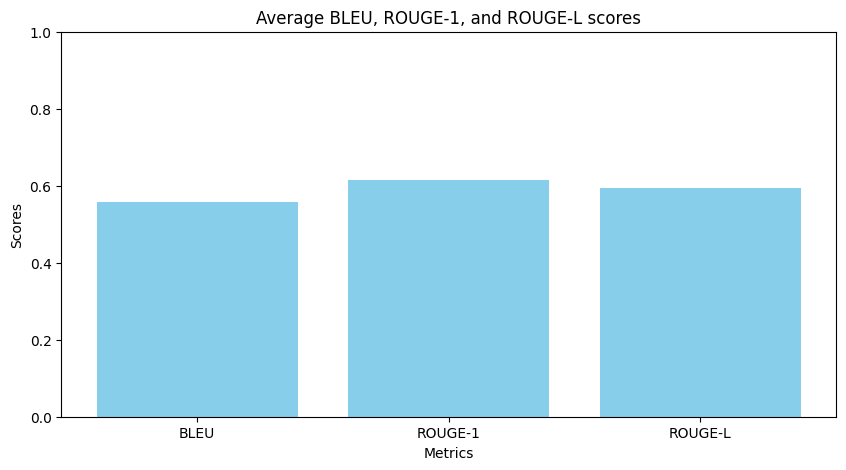

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Average BLEU, ROUGE-1, and ROUGE-L scores')
plt.ylim(0, 1)
plt.show()

In [ ]:
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-L']
values = [average_bleu, average_rouge1, average_rougeL]


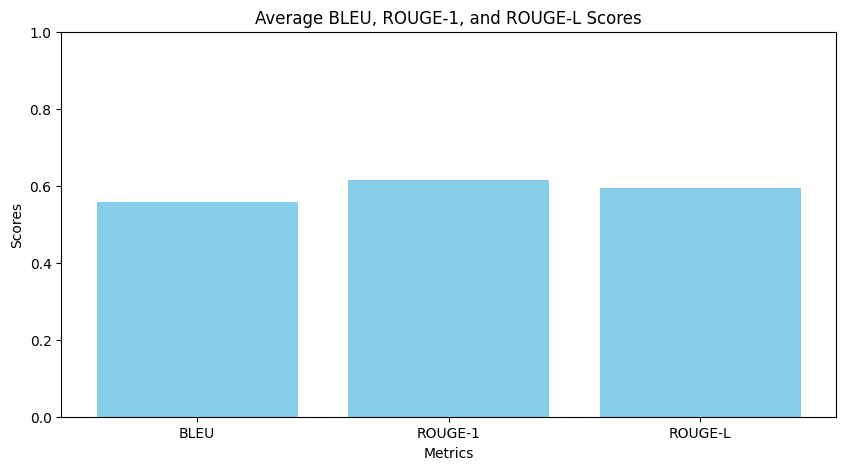

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Average BLEU, ROUGE-1, and ROUGE-L Scores')
plt.ylim(0, 1)
plt.show()

In [ ]:
key_metrics = ['Component Name', 'Style', 'Border Radius', 'Stroke Weight', 'Drop Shadow']


In [ ]:
correctness_values = [overall_component_correct, overall_style_correct, overall_border_radius_correct, overall_stroke_weight_correct, overall_drop_shadow_correct]


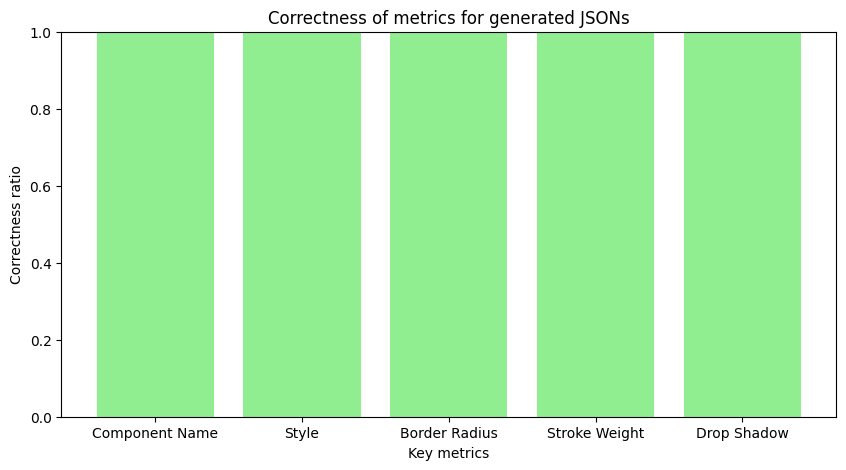

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(key_metrics, correctness_values, color='lightgreen')
plt.xlabel('Key metrics')
plt.ylabel('Correctness ratio')
plt.title('Correctness of metrics for generated JSONs')
plt.ylim(0, 1)
plt.show()

In [ ]:
bleu_scores = []
rouge1_scores = []
rougeL_scores = []

In [ ]:
for i, reference_json in enumerate(subset_reference_jsons):
  generated_json = generated_jsons[i]
  reference_json_str = json.dumps(reference_json) if isinstance(reference_json, dict) else reference_json

  bleu_scores.append(calculate_bleu(reference_json_str, generated_json))
  rouge1_score, rougeL_score = calculate_rouge(reference_json_str, generated_json)
  rouge1_scores.append(rouge1_score)
  rougeL_scores.append(rougeL_score)

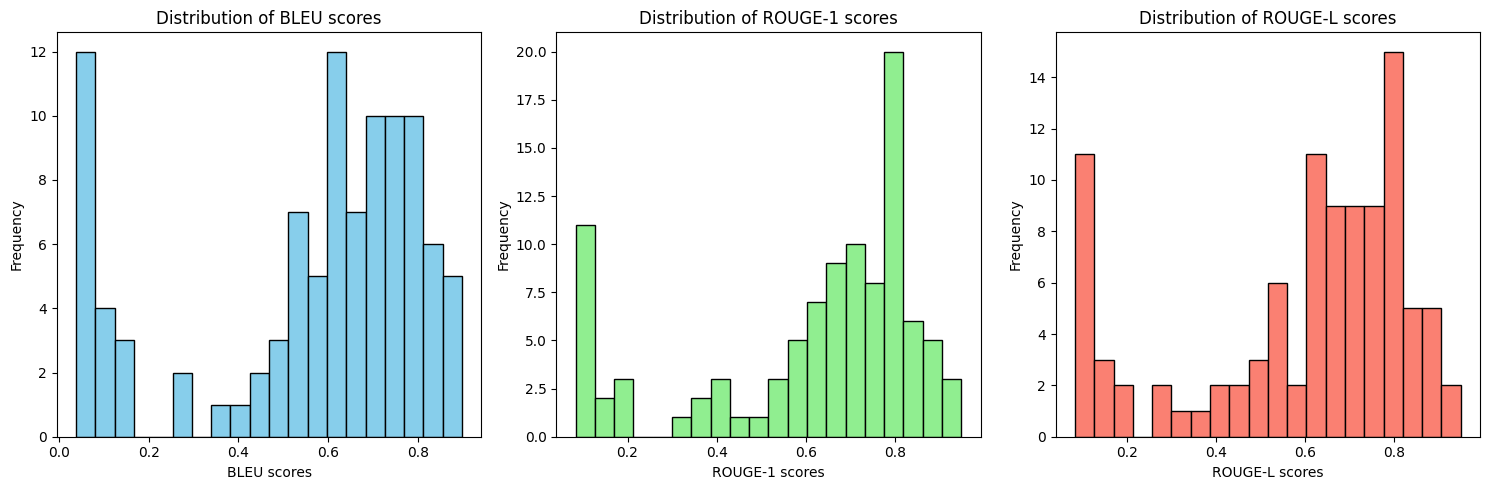

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(bleu_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BLEU scores')
plt.xlabel('BLEU scores')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(rouge1_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of ROUGE-1 scores')
plt.xlabel('ROUGE-1 scores')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(rougeL_scores, bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of ROUGE-L scores')
plt.xlabel('ROUGE-L scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
def identify_component_name_in_json(json_str):
  """method to identify the component name in the json string
  Parameters
  json_str-json string
  Returns
  component name-component name
  """
  match = re.search(r'"component_name"\s*:\s*"([^"]+)"', json_str)
  if match:
    return match.group(1).replace("-", " ").lower()
  return None

In [ ]:
def identify_component_name_in_description(description):
  """method to identify the component name in the description
  Parameters
  description-description
  Returns
  component name-component name
  """
  components = ['icon-button', 'button', 'label', 'input-field', 'menu', 'list-item']
  description_lower = description.lower()

  # Normalize description by removing spaces and hyphens
  normalized_description = description_lower.replace(" ", "").replace("-", "")

  for component in components:
    normalized_component = component.replace("-", "")
    if normalized_component in normalized_description:
      return component

  return None

In [ ]:
def calculate_component_accuracy(reference_str, generated_str):
  """method to calculate the component accuracy
  Parameters
  reference_str-reference json string
  generated_str-generated json string
  Returns
  is_correct-is correct
  ref_component_name-reference component name
  gen_component_name-generated component name
  """
  ref_component_name = identify_component_name_in_json(reference_str)
  gen_component_name = identify_component_name_in_json(generated_str)
  #"icon" being equal to "icon button"
  if ref_component_name == "icon button" and gen_component_name == "icon":
    gen_component_name = "icon button"
  if ref_component_name is None or gen_component_name is None:
    return False, ref_component_name, gen_component_name
  return ref_component_name == gen_component_name, ref_component_name, gen_component_name


In [ ]:
true_labels = []
predicted_labels = []
correct_component_predictions = 0


In [ ]:
for i, reference_str in enumerate(subset_reference_jsons):
  generated_str = generated_jsons[i]

  print(f"Dataset JSON: {reference_str}")
  print(f"Generated JSON: {generated_str}")

  #component accuracy
  is_correct, ref_component_name, gen_component_name = calculate_component_accuracy(reference_str, generated_str)

  # Only append non-None values
  if ref_component_name is not None and gen_component_name is not None:
    true_labels.append(ref_component_name)
    predicted_labels.append(gen_component_name)
    if is_correct:
      correct_component_predictions += 1

  print(f"Description: {subset_prompts[i]}")
  print(f"Name in Dataset: {ref_component_name}")
  print(f"Name in Generated: {gen_component_name}")
  print("--------------------------------------------------")

Dataset JSON: {"variant_properties": {"color": "rgba(73, 69, 79, 1.0)", "strokes": ["rgba(202, 196, 208, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(73, 69, 79, 1.0)", "borderRadius": 100.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 11.0, "effects": [], "padding": 0, "width": 360.0, "height": 0.0, "x": 15469.0, "y": 9818.0, "hasIcon": true, "style": "Professional", "component_name": "list-item", "subtype": "Light", "variant_details": {"Condition": ["3-line+"], "Leading": ["Radio Button"], "Trailing": ["None"], "Show overline": ["True"], "Show supporting text": ["False"]}}}
Generated JSON: "variant_properties": "color": "rgba(202, 196, 208, 1.0)", "strokes": ["rgba(73, 69, 79, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(202, 196, 208, 1.0)", "borderRadius": 100.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 11.0, "effects": [], "padding": 0, "width": 360.0, "height": 0.0, "x": 16949.0, "y": 6138.0, "style": "Professional", 

In [ ]:
# Replace None with 'none' to avoid type errors
true_labels = ['none' if label is None else label for label in true_labels]
predicted_labels = ['none' if label is None else label for label in predicted_labels]


In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9743589743589743
Precision: 0.9816849816849816
Recall: 0.9743589743589743
F1 Score: 0.9762303781911624


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
# Generate confusion matrix
labels = ["button", "label", "input-field", "list-item", "menu", "icon button", "none"]
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)


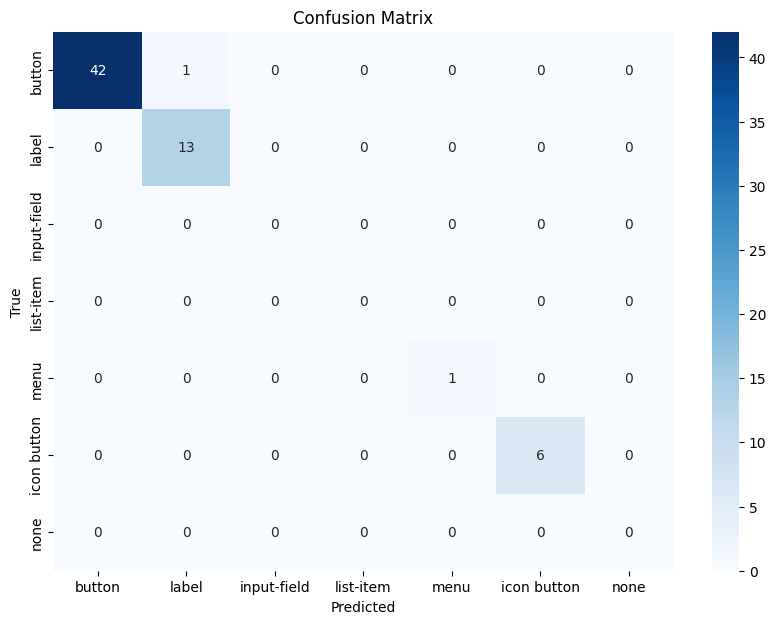

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

In [ ]:
# Binarize the labels for ROC calculation
true_binarized = label_binarize(true_labels, classes=labels)
pred_binarized = label_binarize(predicted_labels, classes=labels)


In [ ]:
for i in range(true_binarized.shape[1]):
  fpr[i], tpr[i], _ = roc_curve(true_binarized[:, i], pred_binarized[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


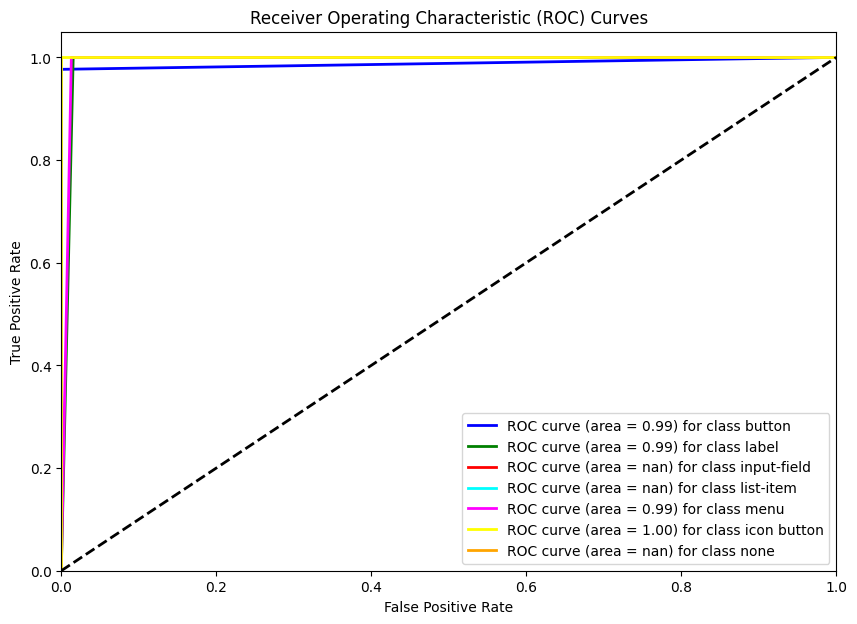

In [ ]:
#ROC curve for each class
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange']
for i, color in enumerate(colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {labels[i]}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## Complex T5 Complex JSON

### Model

In [ ]:
#path
model_save_path= '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 CROSS NESTED'

In [ ]:
def load_model_and_tokenizer(model_path):
  """ method to load the model and tokenizer
  Parameters:
  model_path (str): path to the model
  Returns:
  tuple: model and tokenizer
  """
  model = T5ForConditionalGeneration.from_pretrained(model_path)
  tokenizer = T5Tokenizer.from_pretrained(model_path)
  return model, tokenizer

In [ ]:
model, tokenizer = load_model_and_tokenizer(model_save_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def standardize_prompt(prompt):
  """ method to standardize the prompt
  Parameters:
  prompt (str): prompt to standardize
  Returns:
  str: standardized prompt
  """
  term_mappings = {
    "menu item": "menu",
    "menuitem": "menu",
    "menu list": "menu",
    "list item": "list-item",
    "listitem": "list-item",
    "input field": "input-field",
    "inputfield": "input-field",
    "iconbutton": "icon-button",
    "iconbutton": "icon-button",
    "button": "button",
    "label": "label"

  }
  for term, standard_term in term_mappings.items():
    prompt = prompt.replace(term, standard_term)

  return prompt

In [ ]:
def generate_json(prompt, model, tokenizer, max_length=1024):
  """method to generate json from prompt
  Parameters:
  prompt (str): prompt to generate json
  model (T5ForConditionalGeneration): model to generate json
  tokenizer (T5Tokenizer): tokenizer to generate json
  max_length (int): maximum length of the generated json
  Returns:
  str: generated json
  """
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  model.to(device)
  prompt = standardize_prompt(prompt)
  #tokenize input description
  inputs= tokenizer(prompt, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length).to(device)
   #generate JSON output
  outputs= model.generate(inputs['input_ids'], max_length=max_length,num_beams=5,early_stopping=True,temperature=0)
  #decode generated tokens to JSON string
  generated_json_str= tokenizer.decode(outputs[0], skip_special_tokens=True)
  return generated_json_str

### button

In [ ]:
prompt_button_1= "Generate a Professional button with a state of hover."

In [ ]:
generated_json= generate_json(prompt_button_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": "State": ["Hover"], "name": "State=Hover", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_button_2= "Generate a Professional button with a size of small, state of default."

In [ ]:
generated_json= generate_json(prompt_button_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": "Size": ["small"], "state": ["default"], "name": "Size=small, state=default", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_button_3= "Generate a Basic button with DROP_SHADOW effects."

In [ ]:
generated_json= generate_json(prompt_button_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "Button", "subtype": "Default", "variant_details": "Size": ["Large"], "name": "Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_button_4="Generate a Professional Button with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_button_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": "Size": ["Large"], "name": "Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_button_5="Generate a Trendy Button"

In [ ]:
generated_json= generate_json(prompt_button_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Trendy", "component_name": "Button", "subtype": "Default", "variant_details": "Size": ["Medium"], "name": "Size=Medium", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


### Label

In [ ]:
prompt_label_1= "Generate a Professional label with a state of hover."

In [ ]:
generated_json= generate_json(prompt_label_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "label", "subtype": "Light", "variant_details": "State": ["hover"], "name": "State=hover", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_label_2= "Generate a casual label with a size of small."

In [ ]:
generated_json= generate_json(prompt_label_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Trendy", "component_name": "Label", "subtype": "Light", "variant_details": "Size": ["small"], "name": "Size=small", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_label_3= "Generate a label with DROP_SHADOW effects."

In [ ]:
generated_json= generate_json(prompt_label_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Trendy", "component_name": "Label", "subtype": "Dark", "variant_details": "Size": ["Medium"], "name": "Size=Medium", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_label_4="Generate a default label with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_label_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "Label", "subtype": "Default", "variant_details": "Size": ["Large"], "name": "Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_label_5="Generate a Professional label"

In [ ]:
generated_json= generate_json(prompt_label_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "label", "subtype": "Light", "variant_details": "Style": ["outlined"], "State": ["disabled"], "Selected": ["true"], "Show trailing icon": ["true"], "Show trailing icon": ["true"], "Leading icon": ["true"], "Shape": ["false"], "name": "type": "COMPONENT", "children": ["name": "state-layer", "type": "FRAME", "width": 210.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "label-text", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Label", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


### input field

In [ ]:
prompt_input_1= "Generate a Basic input-field with a state of hover."

In [ ]:
generated_json= generate_json(prompt_input_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "input-field", "subtype": "Default", "variant_details": "State": ["hover"], "name": "State=hover", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Input", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Input", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_input_2= "Generate a input-field."

In [ ]:
generated_json= generate_json(prompt_input_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "input-field", "subtype": "Default", "variant_details": "Style": ["outlined"], "State": ["Default"], "Selected": ["False"], "Show supporting text": ["False"], "Show supporting text": ["True"], "Leading icon": ["True"], "State": ["Default"], "name": "Style=outlined, State=Default, Show supporting text=False, Trailing icon=True, Show supporting text=False", "type": "COMPONENT", "children": ["name": "state-layer overlay", "type": "INSTANCE", "children": ["name": "state-layer", "type": "FRAME", "width": 360.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Input", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Input", "textColor": "r"

In [ ]:
prompt_input_3= "Generate a Professional input-field with a state of small."

In [ ]:
generated_json= generate_json(prompt_input_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "input-field", "subtype": "Default", "variant_details": "State": ["small"], "name": "State=small", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Input", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Input", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


In [ ]:
prompt_input_4="Generate a default input field with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_input_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "input-field", "subtype": "Default", "variant_details": "Type": ["Default"], "State": ["Default"], "Selected": ["False"], "Show supporting text": ["True"], "Show supporting text": ["True"], "Show supporting text": ["True"], "name": "Type=Default, State=Default, Show overline=True, Show supporting text=True, Show supporting text=True", "type": "COMPONENT", "children": ["name": "state-layer overlay", "type": "INSTANCE", "children": ["name": "state-layer", "type": "FRAME", "width": 360.0, "height": 56.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Input", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Input", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "

In [ ]:
prompt_input_5="Generate a playful input field with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_input_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Playful", "component_name": "input-field", "subtype": "Default", "variant_details": "Type": ["Default"], "Size": ["Small"], "name": "Type=Default, Size=Small", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Input", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Input", "textColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0]]


### Menu

In [ ]:
prompt_menu_1= "Generate a Basic menu with a state of hover."

In [ ]:
generated_json= generate_json(prompt_menu_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "menu", "subtype": "Default", "variant_details": "State": ["Hover"], "name": "State=Hover", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 24.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_menu_2= "Generate a menu."

In [ ]:
generated_json= generate_json(prompt_menu_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "menu", "subtype": "Default", "variant_details": "Size": ["Small"], "name": "Size=Small", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_menu_3= "Generate a Professional menu item with a small state."

In [ ]:
generated_json= generate_json(prompt_menu_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "menu", "subtype": "Default", "variant_details": "Size": ["Small"], "name": "Size=Small", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_menu_4="Generate a default menu item with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_menu_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "menu", "subtype": "Default", "variant_details": "Size": ["Large"], "name": "Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_menu_5="Generate a playful menu list with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_menu_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Playful", "component_name": "menu", "subtype": "Default", "variant_details": "Size": ["Large"], "name": "Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


### list-item

In [ ]:
prompt_list_1= "Generate a Basic list item with a state of hover."

In [ ]:
generated_json= generate_json(prompt_list_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "list-item", "subtype": "Dark", "variant_details": "Condition": ["3-line+"], "Leading": ["Icon"], "Trailing": ["Icon"], "Show overline": ["True"], "Show supporting text": ["True"], "name": "Condition=3-line+, Leading=Icon, Trailing=None, Show overline=True, Show supporting text=False", "type": "COMPONENT", "children": ["name": "state-layer overlay", "type": "INSTANCE", "children": [], "name": "state-layer", "type": "FRAME", "width": 360.0, "height": 88.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading element", "type": "FRAME", "width": 40.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Building Blocks/image-Thumbnail", "type": "INSTANCE", "children": ["name": "Thumbnail", "type": "RECTANGLE", "width": 40.0, "height": 40.0, "fillColor": ]], "name": "Content", "type": "FRAME

In [ ]:
prompt_list_2= "Generate a list item."

In [ ]:
generated_json= generate_json(prompt_list_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "list-item", "subtype": "Dark", "variant_details": "Condition": ["3-line+"], "Leading": ["Radio Button"], "Trailing": ["None"], "Show overline": ["True"], "Show supporting text": ["True"], "name": "Condition=3-line+, Leading=Radio Button, Trailing=Radio Button, Show overline=True, Show supporting text=True", "type": "COMPONENT", "children": ["name": "state-layer overlay", "type": "INSTANCE", "children": [], "name": "state-layer", "type": "FRAME", "width": 360.0, "height": 88.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading element", "type": "FRAME", "width": 40.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading element", "type": "FRAME", "width": 40.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children":

In [ ]:
prompt_list_3= "Generate a playful listitem with a state of hover."

In [ ]:
generated_json= generate_json(prompt_list_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Playful", "component_name": "list-item", "subtype": "Dark", "variant_details": "Condition": ["3-line+"], "Leading": ["None"], "Trailing": ["Icon"], "Show overline": ["True"], "Show supporting text": ["True"], "name": "Condition=3-line+, Leading=Icon, Trailing=None, Show overline=True, Show supporting text=True", "type": "COMPONENT", "children": ["name": "state-layer overlay", "type": "INSTANCE", "children": [], "name": "state-layer", "type": "FRAME", "width": 360.0, "height": 88.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading element", "type": "FRAME", "width": 40.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Building Blocks/image-Thumbnail", "type": "INSTANCE", "children": ["name": "Thumbnail", "type": "RECTANGLE", "width": 210.0, "height": 56.0, "fillColor": ]], "name": "Content", "type": "FRA

In [ ]:
prompt_list_4="Generate a default listitem with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_list_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Professional", "component_name": "list-item", "subtype": "Light", "variant_details": "Condition": ["3-line+"], "Leading": ["Radio Button"], "Trailing": ["Icon"], "Show overline": ["True"], "Show supporting text": ["True"], "name": "Condition=3-line+, Leading=Radio Button, Trailing=Radio Button, Show overline=True, Show supporting text=True", "type": "COMPONENT", "children": ["name": "state-layer overlay", "type": "INSTANCE", "children": [], "name": "state-layer", "type": "FRAME", "width": 360.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading element", "type": "FRAME", "width": 40.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Leading element", "type": "FRAME", "width": 40.0, "height": 40.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children"

In [ ]:
prompt_list_5="Generate a trendy list item with drop_shadow effects"

In [ ]:
generated_json= generate_json(prompt_list_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Trendy", "component_name": "menu", "subtype": "Default", "variant_details": "Size": ["Large"], "name": "Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


### icon button

In [ ]:
prompt_icon_1= "Generate a Basic icon button with a state of hover."

In [ ]:
generated_json= generate_json(prompt_icon_1, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "icon button", "subtype": "Default", "variant_details": "State": ["Hover"], "name": "State=Hover", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_icon_2= "Generate a iconbutton."

In [ ]:
generated_json= generate_json(prompt_icon_2, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "icon-button", "subtype": "Default", "variant_details": "Size": ["Medium"], "name": "Size=Medium", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_icon_3= "Generate a playful iconbutton with a state of hover."

In [ ]:
generated_json= generate_json(prompt_icon_3, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Playful", "component_name": "icon-button", "subtype": "Default", "variant_details": "State": ["Hover"], "name": "State=Hover", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_icon_4="Generate a default icon button with a border radius of 10.0"

In [ ]:
generated_json= generate_json(prompt_icon_4, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Basic", "component_name": "icon button", "subtype": "Default", "variant_details": "Size": ["Large"], "name": "Size=Large", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


In [ ]:
prompt_icon_5="Generate a trendy icon button with a stroke weight of 2.0"

In [ ]:
generated_json= generate_json(prompt_icon_5, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "style": "Trendy", "component_name": "icon button", "subtype": "Default", "variant_details": "Size": ["Medium"], "name": "Size=Medium", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 32.0, "height": 32.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 12.500054359436035, "iconHeight": 12.500054359436035, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]]


### Metrics

In [ ]:
import json
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import nltk
import re
import random
import matplotlib.pyplot as plt

In [ ]:

def calculate_bleu(reference, hypothesis):
  """method to calculate the bleu score
  Parameters:
  reference (str): reference json string
  hypothesis (str): generated json string
  Returns:
  float: bleu score
  """
  reference_tokens = nltk.word_tokenize(reference)
  hypothesis_tokens = nltk.word_tokenize(hypothesis)
  return nltk.translate.bleu_score.sentence_bleu([reference_tokens], hypothesis_tokens)


In [ ]:
def calculate_rouge(reference, hypothesis):
  """method to calculate the rouge score
  Parameters:
  reference (str): reference json string
  hypothesis (str): generated json string
  Returns:
  float: rouge1 score
  float: rougeL score
  """
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
  scores = scorer.score(reference, hypothesis)
  return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [ ]:
def calculate_key_metrics(reference_json, generated_json_str):
  """method to calculate the key metrics
  Parameters:
  reference_json (str): reference json string
  generated_json_str (str): generated json string
  Returns:
  tuple: component name correct, style correct, border radius correct, stroke weight correct, drop shadow correct
  """
  try:
    reference_data = json.loads(reference_json)
  except json.JSONDecodeError:
    print("Error decoding reference JSON")
    return 0, 0, 0, 0, 0  # default values if decoding fails

  #key phrases directly in the generated JSON string
  component_name_correct = reference_data.get('component_name', '') in generated_json_str
  style_correct = reference_data.get('style', '') in generated_json_str
  border_radius_correct = str(reference_data.get('border_radius', '')) in generated_json_str
  stroke_weight_correct = str(reference_data.get('stroke_weight', '')) in generated_json_str
  drop_shadow_correct = 'drop_shadow' in generated_json_str if 'drop_shadow' in reference_data else True

  return component_name_correct, style_correct, border_radius_correct, stroke_weight_correct, drop_shadow_correct

In [ ]:
#Subset
subset_size = 100

In [ ]:
#random subset of the dataset
subset_indices = random.sample(range(len(json_data_1)), subset_size)
subset_prompts = [prompts_1[i] for i in subset_indices]
subset_reference_jsons = [json_data_1[i] for i in subset_indices]

In [ ]:
generated_jsons = [generate_json(prompt, model, tokenizer) for prompt in subset_prompts]

In [ ]:
total_bleu, total_rouge1, total_rougeL = 0, 0, 0
true_component_names = []
predicted_component_names = []

In [ ]:
for i, reference_json in enumerate(subset_reference_jsons):
  generated_json = generated_jsons[i]

  #BLEU score
  bleu_score = calculate_bleu(reference_json, generated_json)
  total_bleu += bleu_score

  #ROUGE score
  rouge1_score, rougeL_score = calculate_rouge(reference_json, generated_json)
  total_rouge1 += rouge1_score
  total_rougeL += rougeL_score

In [ ]:

overall_component_correct, overall_style_correct = 0, 0
overall_border_radius_correct, overall_stroke_weight_correct, overall_drop_shadow_correct = 0, 0, 0


In [ ]:
for i, reference_json in enumerate(subset_reference_jsons):
  generated_json = generated_jsons[i]

  #key metrics
  component_correct, style_correct, border_radius_correct, stroke_weight_correct, drop_shadow_correct = calculate_key_metrics(reference_json, generated_json)

  # Sum up the individual metrics for overall calculation
  overall_component_correct += component_correct
  overall_style_correct += style_correct
  overall_border_radius_correct += border_radius_correct
  overall_stroke_weight_correct += stroke_weight_correct
  overall_drop_shadow_correct += drop_shadow_correct

In [ ]:
total_prompts = len(subset_prompts)
overall_component_correct /= total_prompts
overall_style_correct /= total_prompts
overall_border_radius_correct /= total_prompts
overall_stroke_weight_correct /= total_prompts
overall_drop_shadow_correct /= total_prompts


In [ ]:
# Calculate overall BLEU and ROUGE scores
average_bleu = total_bleu / total_prompts
average_rouge1 = total_rouge1 / total_prompts
average_rougeL = total_rougeL / total_prompts


In [ ]:
print(f"Overall Component Name Correct: {overall_component_correct}")
print(f"Overall Style Correct: {overall_style_correct}")
print(f"Overall Border Radius Correct: {overall_border_radius_correct}")
print(f"Overall Stroke Weight Correct: {overall_stroke_weight_correct}")
print(f"Overall Drop Shadow Correct: {overall_drop_shadow_correct}")
print(f"Average BLEU Score: {average_bleu}")
print(f"Average ROUGE-1 Score: {average_rouge1}")
print(f"Average ROUGE-L Score: {average_rougeL}")

Overall Component Name Correct: 1.0
Overall Style Correct: 1.0
Overall Border Radius Correct: 1.0
Overall Stroke Weight Correct: 1.0
Overall Drop Shadow Correct: 1.0
Average BLEU Score: 0.3771135932749983
Average ROUGE-1 Score: 0.4511159410329065
Average ROUGE-L Score: 0.2503257304540007


In [ ]:
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-L']

In [ ]:
values = [average_bleu, average_rouge1, average_rougeL]


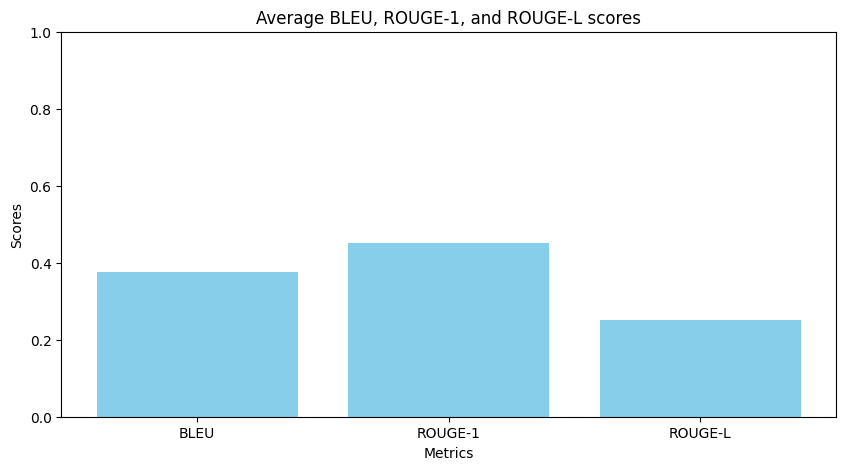

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Average BLEU, ROUGE-1, and ROUGE-L scores')
plt.ylim(0, 1)
plt.show()

In [ ]:
key_metrics = ['Component Name', 'Style', 'Border Radius', 'Stroke Weight', 'Drop Shadow']


In [ ]:
correctness_values = [overall_component_correct, overall_style_correct, overall_border_radius_correct, overall_stroke_weight_correct, overall_drop_shadow_correct]


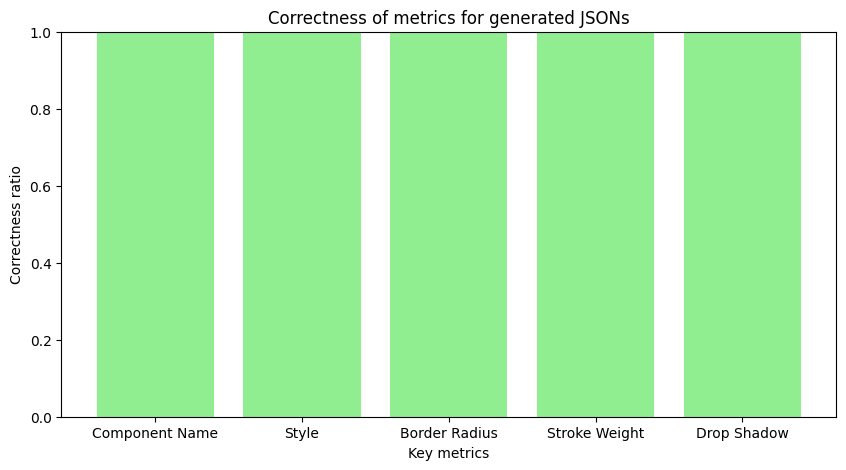

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(key_metrics, correctness_values, color='lightgreen')
plt.xlabel('Key metrics')
plt.ylabel('Correctness ratio')
plt.title('Correctness of metrics for generated JSONs')
plt.ylim(0, 1)
plt.show()

In [ ]:
bleu_scores = []
rouge1_scores = []
rougeL_scores = []

In [ ]:

for i, reference_json in enumerate(subset_reference_jsons):
  generated_json = generated_jsons[i]
  reference_json_str = json.dumps(reference_json) if isinstance(reference_json, dict) else reference_json

  bleu_scores.append(calculate_bleu(reference_json_str, generated_json))
  rouge1_score, rougeL_score = calculate_rouge(reference_json_str, generated_json)
  rouge1_scores.append(rouge1_score)
  rougeL_scores.append(rougeL_score)

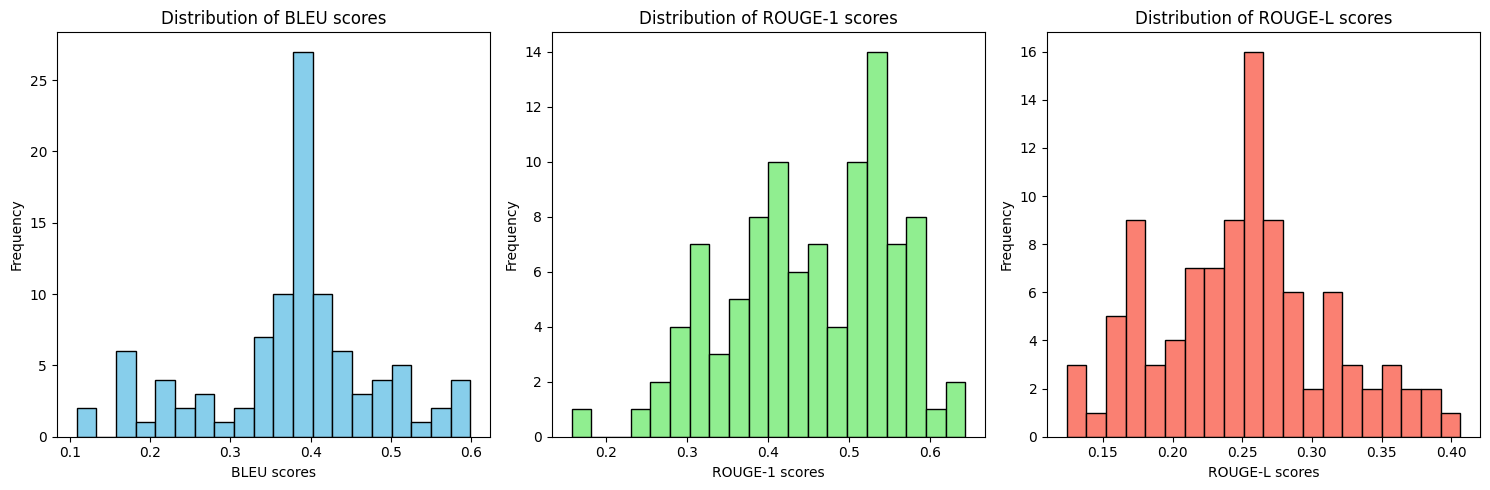

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(bleu_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BLEU scores')
plt.xlabel('BLEU scores')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(rouge1_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of ROUGE-1 scores')
plt.xlabel('ROUGE-1 scores')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(rougeL_scores, bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of ROUGE-L scores')
plt.xlabel('ROUGE-L scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
def identify_component_name_in_json(json_str):
  """method to identify the component name in the JSON string
  Parameters:
  json_str (str): JSON string
  Returns:
  str: component name
  """
  match = re.search(r'"component_name"\s*:\s*"([^"]+)"', json_str)
  if match:
    return match.group(1).replace("-", " ").lower()
  return None

In [ ]:
def identify_component_name_in_description(description):
  """method to identify the component name in the description
  Parameters:
  description (str): description
  Returns:
  str: component name
  """
  components = ['icon-button', 'button', 'label', 'input-field', 'menu', 'list-item']
  description_lower = description.lower()

  # Normalize description by removing spaces and hyphens
  normalized_description = description_lower.replace(" ", "").replace("-", "")

  for component in components:
    normalized_component = component.replace("-", "")
    if normalized_component in normalized_description:
      return component

  return None

In [ ]:
def calculate_component_accuracy(reference_str, generated_str):
  """method to calculate the component accuracy
  Parameters:
  reference_str (str): reference JSON string
  generated_str (str): generated JSON string
  Returns:
  bool: component name correct
  str: reference component name
  str: generated component name
  """
  ref_component_name = identify_component_name_in_json(reference_str)
  gen_component_name = identify_component_name_in_json(generated_str)
  # Handle "icon" being equal to "icon button"
  if ref_component_name == "icon button" and gen_component_name == "icon":
    gen_component_name = "icon button"
  if ref_component_name is None or gen_component_name is None:
    return False, ref_component_name, gen_component_name
  return ref_component_name == gen_component_name, ref_component_name, gen_component_name


In [ ]:
true_labels = []
predicted_labels = []
correct_component_predictions = 0


In [ ]:
for i, reference_str in enumerate(subset_reference_jsons):
  """method to calculate the component accuracy
  Parameters:
  reference_str (str): reference JSON string
  generated_str (str): generated JSON string
  Returns:
  bool: component name correct
  str: reference component name
  str: generated component name
  """
  generated_str = generated_jsons[i]

  print(f"Dataset JSON: {reference_str}")
  print(f"Generated JSON: {generated_str}")

  #component accuracy
  is_correct, ref_component_name, gen_component_name = calculate_component_accuracy(reference_str, generated_str)

  # Only append non-None values
  if ref_component_name is not None and gen_component_name is not None:
      true_labels.append(ref_component_name)
      predicted_labels.append(gen_component_name)
      if is_correct:
          correct_component_predictions += 1

  print(f"Description: {subset_prompts[i]}")
  print(f"Name in Dataset: {ref_component_name}")
  print(f"Name in Generated: {gen_component_name}")
  print("--------------------------------------------------")

Dataset JSON: {"variant_properties": {"color": "rgba(103, 80, 164, 1.0)", "strokes": ["rgba(202, 196, 208, 1.0)"], "strokeWeight": 1.0, "text": "100+", "textColor": "rgba(73, 69, 79, 1.0)", "borderRadius": 100.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 11.0, "effects": [], "padding": 0, "width": 360.0, "height": 0.0, "x": 16989.0, "y": 8934.0, "hasIcon": true, "style": "Professional", "component_name": "list-item", "subtype": "Light", "variant_details": {"Condition": ["2-line"], "Leading": ["Video"], "Trailing": ["Radio Button"], "Show overline": ["True"], "Show supporting text": ["False"]}}}
Generated JSON: "variant_properties": "style": "Professional", "component_name": "list-item", "subtype": "Dark", "variant_details": "Condition": ["2-line"], "Leading": ["Video"], "Trailing": ["Radio Button"], "Show overline": ["True"], "Show supporting text": ["True"], "name": "Condition=2-line, Leading=Video, Trailing=Radio Button, Show overline=True, Show supporting text=False", "

In [ ]:
# Replace None with 'none' to avoid type errors
true_labels = ['none' if label is None else label for label in true_labels]
predicted_labels = ['none' if label is None else label for label in predicted_labels]


In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1 Score: 0.9848148148148148


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
# Generate confusion matrix
labels = ["button", "label", "input-field", "list-item", "menu", "icon button", "none"]
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)


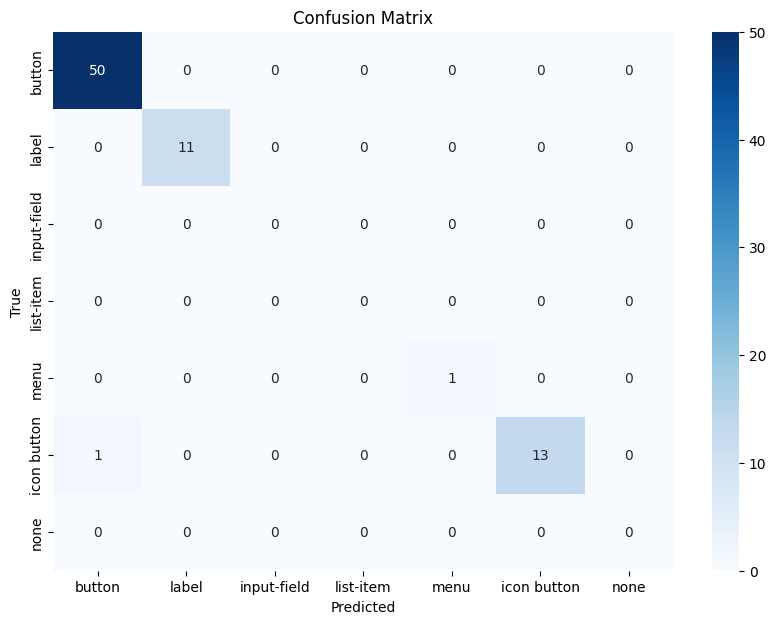

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

In [ ]:
# Binarize the labels for ROC calculation
true_binarized = label_binarize(true_labels, classes=labels)
pred_binarized = label_binarize(predicted_labels, classes=labels)


In [ ]:
for i in range(true_binarized.shape[1]):
  fpr[i], tpr[i], _ = roc_curve(true_binarized[:, i], pred_binarized[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


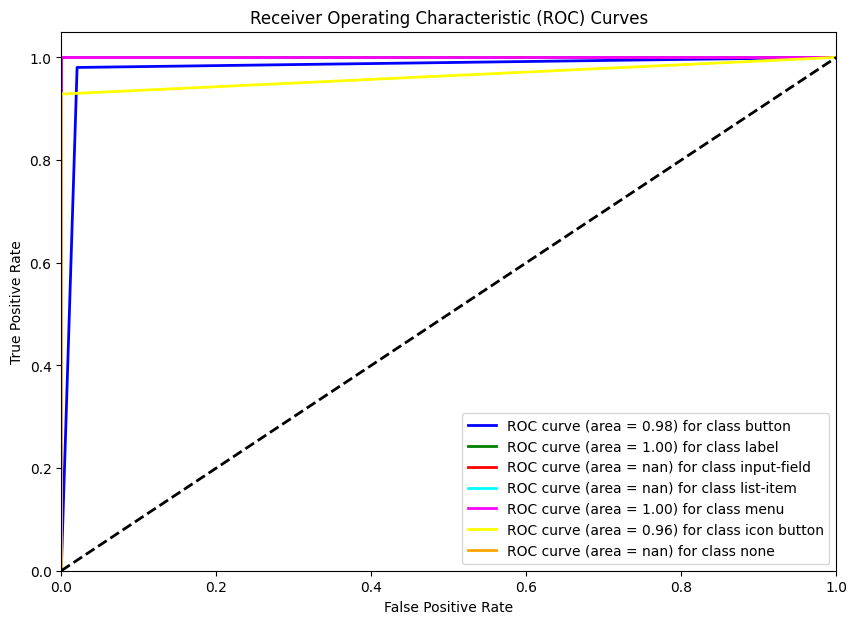

In [ ]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange']
for i, color in enumerate(colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {labels[i]}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()